# Study on Student Academic Success

---

We investigate the student dropouts and academic sucess using binary classification, clustering and anomaly detection

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

studentData = pd.read_csv('dataset.csv')
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
studentData.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [3]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
studentData.isnull().sum()
# no null values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
studentData.duplicated()
# no duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

In [6]:
# rename Nactionality to Nationality
studentData.rename({"Nacionality" : "Nationality"}, inplace=True, axis=1)
studentData.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

---
### EDA

In [7]:
df = studentData.copy()
df.sample(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
791,1,12,1,12,1,1,1,3,3,3,...,0,7,9,0,0.0,0,15.5,2.8,-4.06,Dropout
3848,1,12,1,4,1,1,1,22,27,7,...,2,8,17,5,11.6,1,15.5,2.8,-4.06,Dropout
3250,1,4,1,13,1,2,1,22,27,10,...,0,7,7,0,0.0,0,12.7,3.7,-1.70,Dropout


Define some helper functions below:

In [8]:
# convert_numeric_to_cat - big big function that converts the categorical numbers to descriptions provided by data source
def convert_numeric_to_cat(col_name):
    # Demographic
    if col_name == "Marital status":
        return {1:"Single",2:"Married",3:"Widower",4:"Divorced",5:"Facto union",6:"Legally separated",}
    elif col_name == "Nationality":
        return{1:"Portuguese",2:"German",3:"Spanish",4:"Italian",5:"Dutch",6:"English",7:"Lithuanian",8:"Angolan",9:"Cape Verdean",10:"Guinean",11:"Mozambican",12:"Santomean",13:"Turkish",14:"Brazilian",15:"Romanian",16:"Moldova (Republic of)",17:"Mexican",18:"Ukrainian",19:"Russian",20:"Cuban",21:"Colombian",}
    # Socioeconomics 
    elif col_name == "Mother's qualification" or col_name == "Father's qualification":
        return {1:"Secondary Education-12th Year of Schooling or Equivalent",2:"Higher Education-bachelor’s degree",3:"Higher Education-degree",4:"Higher Education-master’s degree",5:"Higher Education-doctorate",6:"Frequency of Higher Education",7:"12th Year of Schooling-not completed",8:"11th Year of Schooling-not completed",9:"7th Year (Old)",10:"Other-11th Year of Schooling",11:"2nd year complementary high school course",12:"10th Year of Schooling",13:"General commerce course",14:"Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",15:"Complementary High School Course",16:"Technical-professional course",17:"Complementary High School Course-not concluded",18:"7th year of schooling",19:"2nd cycle of the general high school course",20:"9th Year of Schooling-not completed",21:"8th year of schooling",22:"General Course of Administration and Commerce",23:"Supplementary Accounting and Administration",24:"Unknown",25:"Cannot read or write",26:"Can read without having a 4th year of schooling",27:"Basic education 1st cycle (4th/5th year) or equivalent",28:"Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",29:"Technological specialization course",30:"Higher education-degree (1st cycle)",31:"Specialized higher studies course",32:"Professional higher technical course",33:"Higher Education-master’s degree (2nd cycle)",34:"Higher Education-doctorate (3rd cycle)}",}
    elif col_name == "Mother's occupation" or  col_name == "Father's occupation":
        return {1:"Student",2:"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",3:"Specialists in Intellectual and Scientific Activities",4:"Intermediate Level Technicians and Professions",5:"Administrative staff",6:"Personal Services, Security and Safety Workers, and Sellers",7:"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",8:"Skilled Workers in Industry, Construction, and Craftsmen",9:"Installation and Machine Operators and Assembly Workers",10:"Unskilled Workers",11:"Armed Forces Professions",12:"Other Situation", 13:"(blank)",14:"Armed Forces Officers",15:"Armed Forces Sergeants",16:"Other Armed Forces personnel",17:"Directors of administrative and commercial services",18:"Hotel, catering, trade, and other services directors",19:"Specialists in the physical sciences, mathematics, engineering, and related techniques",20:"Health professionals",21:"Teachers",22:"Specialists in finance, accounting, administrative organization, and public and commercial relations",23:"Intermediate level science and engineering technicians and professions",24:"Technicians and professionals of intermediate level of health",25:"Intermediate level technicians from legal, social, sports, cultural, and similar services",26:"Information and communication technology technicians",27:"Office workers, secretaries in general, and data processing operators",28:"Data, accounting, statistical, financial services, and registry-related operators",29:"Other administrative support staff",30:"Personal service workers",31:"Sellers",32:"Personal care workers and the like",33:"Protection and security services personnel",34:"Market-oriented farmers and skilled agricultural and animal production workers",35:"Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",36:"Skilled construction workers and the like, except electricians",37:"Skilled workers in metallurgy, metalworking, and similar",38:"Skilled workers in electricity and electronics",39:"Workers in food processing, woodworking, and clothing and other industries and crafts",40:"Fixed plant and machine operators",41:"Assembly workers",42:"Vehicle drivers and mobile equipment operators",43:"Unskilled workers in agriculture, animal production, and fisheries and forestry",44:"Unskilled workers in extractive industry, construction, manufacturing, and transport",45:"Meal preparation assistants",46:"Street vendors (except food) and street service providers",}
    # Academic data
    elif col_name == "Application mode":
        return {1:"1st phase-general contingent",2:"Ordinance No. 612/93",3:"1st phase-special contingent (Azores Island)",4:"Holders of other higher courses",5:"Ordinance No. 854-B/99",6:"International student (bachelor)",7:"1st phase-special contingent (Madeira Island)",8:"2nd phase-general contingent",9:"3rd phase-general contingent",10:"Ordinance No. 533-A/99, item b2) (Different Plan)",11:"Ordinance No. 533-A/99, item b3 (Other Institution)",12:"Over 23 years old",13:"Transfer",14:"Change in course",15:"Technological specialization diploma holders",16:"Change in institution/course",17:"Short cycle diploma holders",18:"Change in institution/course (International)",}
    elif col_name == "Course":
        return {1:"Biofuel Production Technologies",2:"Animation and Multimedia Design",3:"Social Service (evening attendance)",4:"Agronomy",5:"Communication Design",6:"Veterinary Nursing",7:"Informatics Engineering",8:"Equiniculture",9:"Management",10:"Social Service",11:"Tourism",12:"Nursing",13:"Oral Hygiene",14:"Advertising and Marketing Management",15:"Journalism and Communication",16:"Basic Education",17:"Management (evening attendance)",}
    elif col_name == "Previous qualification":
        return {1:"Secondary education",2:"Higher education-bachelor’s degree",3:"Higher education-degree",4:"Higher education-master’s degree",5:"Higher education-doctorate",6:"Frequency of higher education",7:"12th year of schooling-not completed",8:"11th year of schooling-not completed",9:"Other-11th year of schooling",10:"10th year of schooling",11:"10th year of schooling-not completed",12:"Basic education 3rd cycle (9th/10th/11th year) or equivalent",13:"Basic education 2nd cycle (6th/7th/8th year) or equivalent",14:"Technological specialization course",15:"Higher education-degree (1st cycle)",16:"Professional higher technical course",17:"Higher education-master’s degree (2nd cycle)"}
    # Other binary values that might not be clear
    elif col_name == "Gender":
        return {0:"Female",1:"Male"}
    elif col_name == "Daytime/evening attendance":
        return {0:"Evening",1:"Daytime"}
    elif col_name == "Target":
        return {0:"Dropout",1:"Graduate",2:"Enrolled"}
    else: 
        print("Assuming it is 1/0 binary value.")
        return {0:"No",1:"Yes"}

In [9]:
def do_stacked_plot_cat(colname,top=10, convert=True):
    df_group = df.groupby([colname, "Target"]).size().reset_index().pivot(columns='Target', index=colname, values=0).copy()
    
    if convert:
        df_group.rename(index=convert_numeric_to_cat(col_name=colname), inplace=True)
    df_group_total = df_group.sum(axis=1)
    df_group_sorted = df_group_total.sort_values(ascending=True)
    df_group_top = df_group_sorted[(len(df_group_sorted) - top):]

    f, axes = plt.subplots(2,1, figsize=(10,20))
    # plot stacked bar first
    ax1 = df_group.loc[df_group_top.index].plot(kind='barh', stacked=True, ax=axes[0])
    ax1.set_ylabel(colname, fontsize=18)
    ax1.set_xlabel("Target", fontsize=18)
    ax1.tick_params(axis='both', which='major', labelsize=14)   
    
    # calculate percent
    df_total_percent = df_group["Dropout"] + df_group["Enrolled"]+ df_group["Graduate"];
    df_group["Dropout"] = df_group["Dropout"] / df_total_percent
    df_group["Enrolled"] = df_group["Enrolled"] / df_total_percent
    df_group["Graduate"] = df_group["Graduate"] / df_total_percent
    
    ax_p = df_group.loc[df_group_top.index].plot(kind='barh', stacked=True, ax=axes[1])
    for c in ax_p.containers:
        labels = [f'{w:.2f}%' if (w := v.get_width()) > 0 else '' for v in c ]
        ax_p.bar_label(c, labels=labels, label_type='center')
    ax_p.set_xlabel("Target Percentage (%)", fontsize=18)
    ax_p.set_ylabel(colname, fontsize=18)
    ax_p.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

In [10]:
def do_stacked_plot_numeric(colname):
    df_group = df.groupby([colname, "Target"]).size().reset_index().pivot(columns='Target', index=colname, values=0)
    df_group.plot(kind='bar', stacked=True)
    plt.xlabel(colname)
    plt.show()

In [11]:
def do_numeric_plot_compare(data1, data2, col):
    f, axes = plt.subplots(2, 2, figsize=(18, 8))
    sb.violinplot(x=col, data = data1, orient = "h", ax = axes[0,0])
    sb.histplot(x=col, data = data1, ax = axes[0,1], kde=True)
    sb.violinplot(x=col,data = data2, orient = "h", ax = axes[1,0])
    sb.histplot(x=col,data = data2, ax = axes[1,1], kde=True)

---
### Response Variable

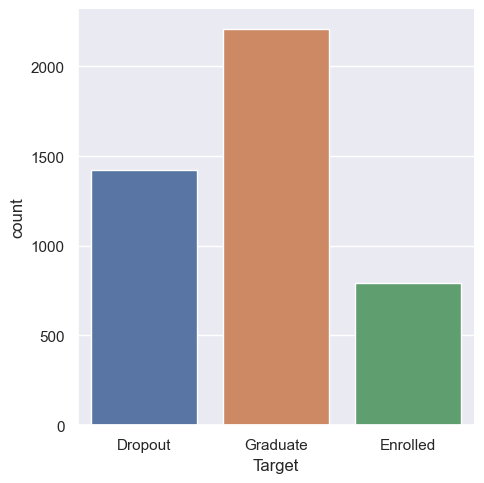

In [12]:
sb.catplot(x="Target", data=df, kind="count")

Graduates are majority, need to even out before we do classification

---
### Heatmap to correlate all variables

<AxesSubplot:>

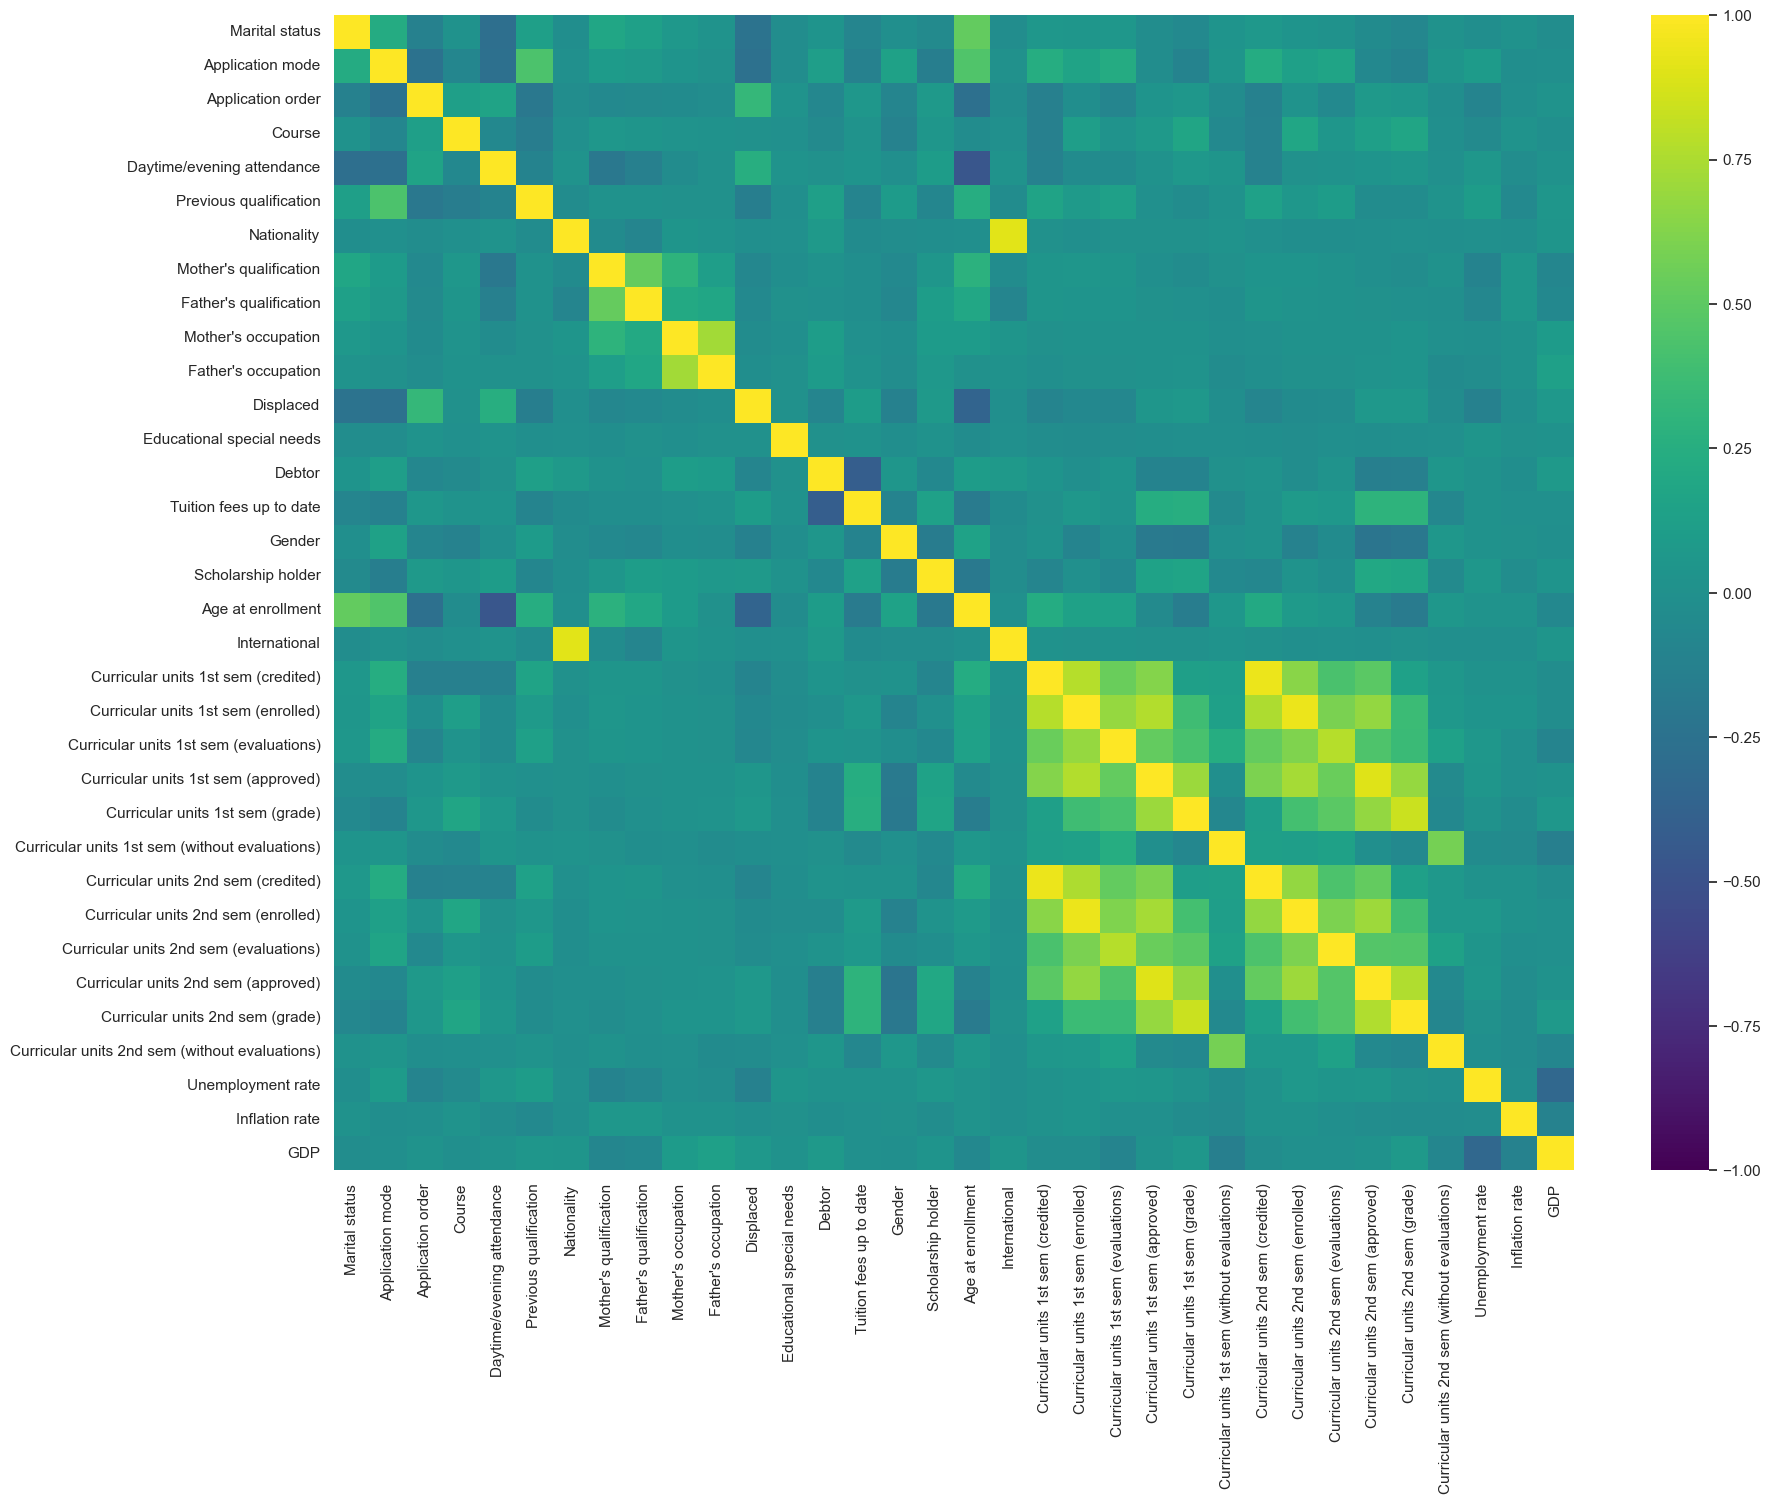

In [13]:
plt.figure(figsize=(20,15))
sb.heatmap(df.corr(), vmin=-1,vmax=1,annot=False, cmap="viridis")

Strong correlation bewtween Nationality and International.\
Moderate correlation bewtween Father's qualification with Father's occupation, and similarly for Mother's.\
Moderately strong correlation between all sem 1 Curricular units with each other, and similarly for sem 2.

In [14]:
df[["International", "Nationality"]].corr()

,International,Nationality
International,1.000000,0.911724
Nationality,0.911724,1.000000


Hence with exception of International and Nationality, dataset is good for anomaly detection.

---

### Explore demographic

dict_values(['Female', 'Male'])

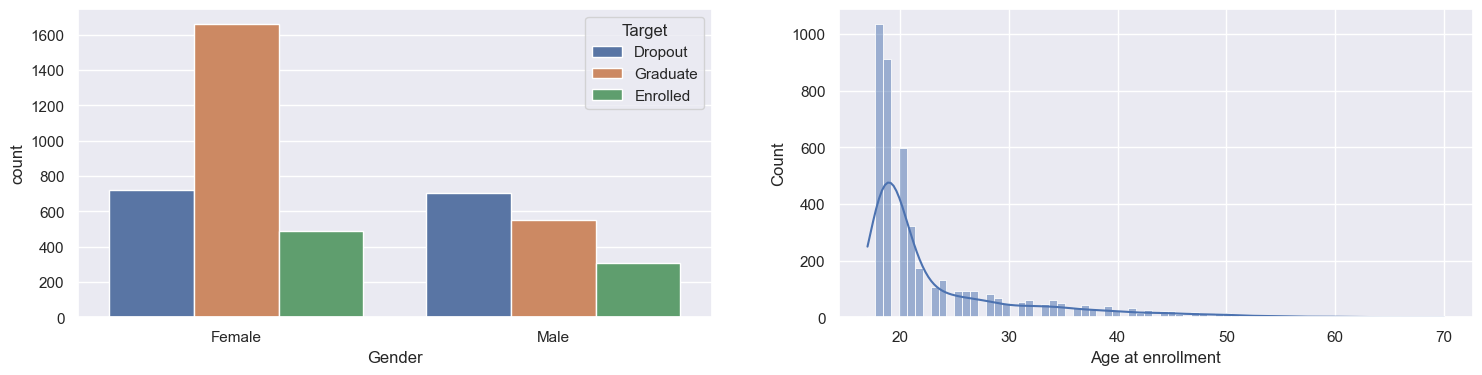

In [15]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="Gender", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=convert_numeric_to_cat("Gender").values())
sb.histplot(data=df["Age at enrollment"], ax=axes[1], kde= True)
convert_numeric_to_cat("Gender").values()

A lot more females graduates, meaning proprotion of female dropouts are lesser than male.\
Age positively skewed, most students are young.

Mainly Portuguese


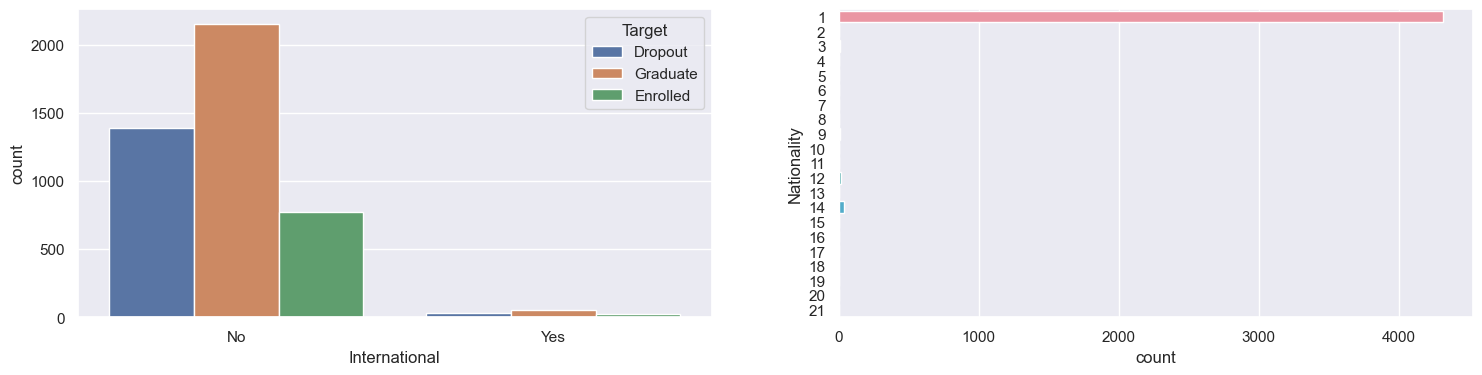

In [16]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="International", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=['No','Yes'])
sb.countplot(y="Nationality", data=df, ax=axes[1])
idx = df["Nationality"].value_counts().sort_values(ascending=False).index[0]
print("Mainly", convert_numeric_to_cat("Nationality")[idx])


Few international students, mostly local protugese students.

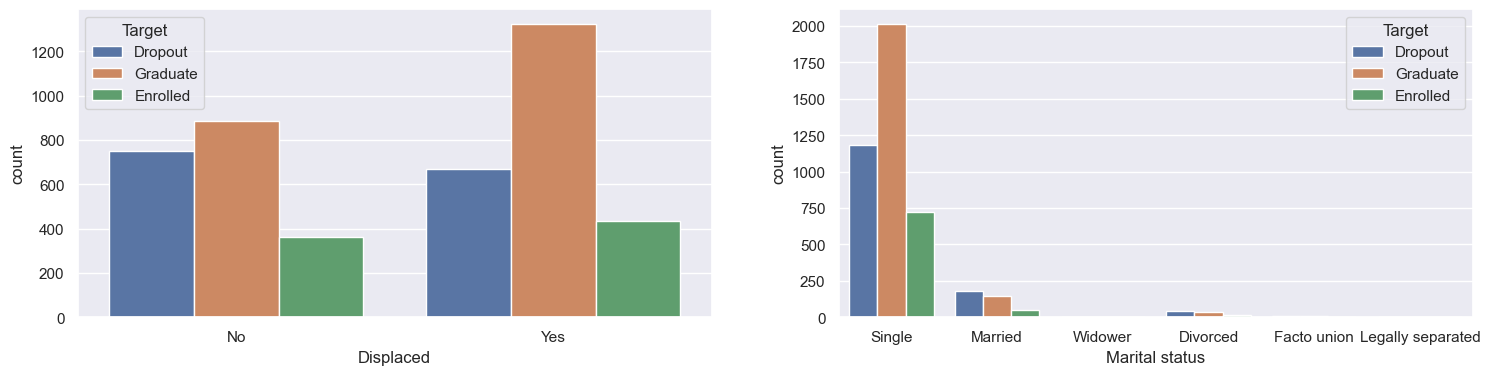

In [17]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="Displaced", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=['No','Yes'])
sb.countplot(x="Marital status", data=df, ax=axes[1], hue="Target").set_xticks(ticks=[0,1,2,3,4,5], labels=convert_numeric_to_cat("Marital status").values())

Majority of students were displaced (from their homes).\
Proportion of dropouts less in displaced students.\
Most were single, but those that were married were more likely to dropout.\
Possible to use `Marital status` to check if married for accessing academic success.

---
### Explore Socioeconomic

In [18]:
# doesnt tell us much because its encoded, so make a copy and replace first before describing
df_socioeco = df[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]].copy()
for col in df_socioeco:
    df_socioeco[col].replace(convert_numeric_to_cat(col), inplace=True)
df_socioeco.describe()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation
count,4424,4424,4424,4424
unique,29,34,32,46
top,Secondary Education-12th Year of Schooling or ...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers
freq,1069,1209,1577,1010


Suprising that the occupation is unskilled worker.\
This proves that the database is not indicative of global population

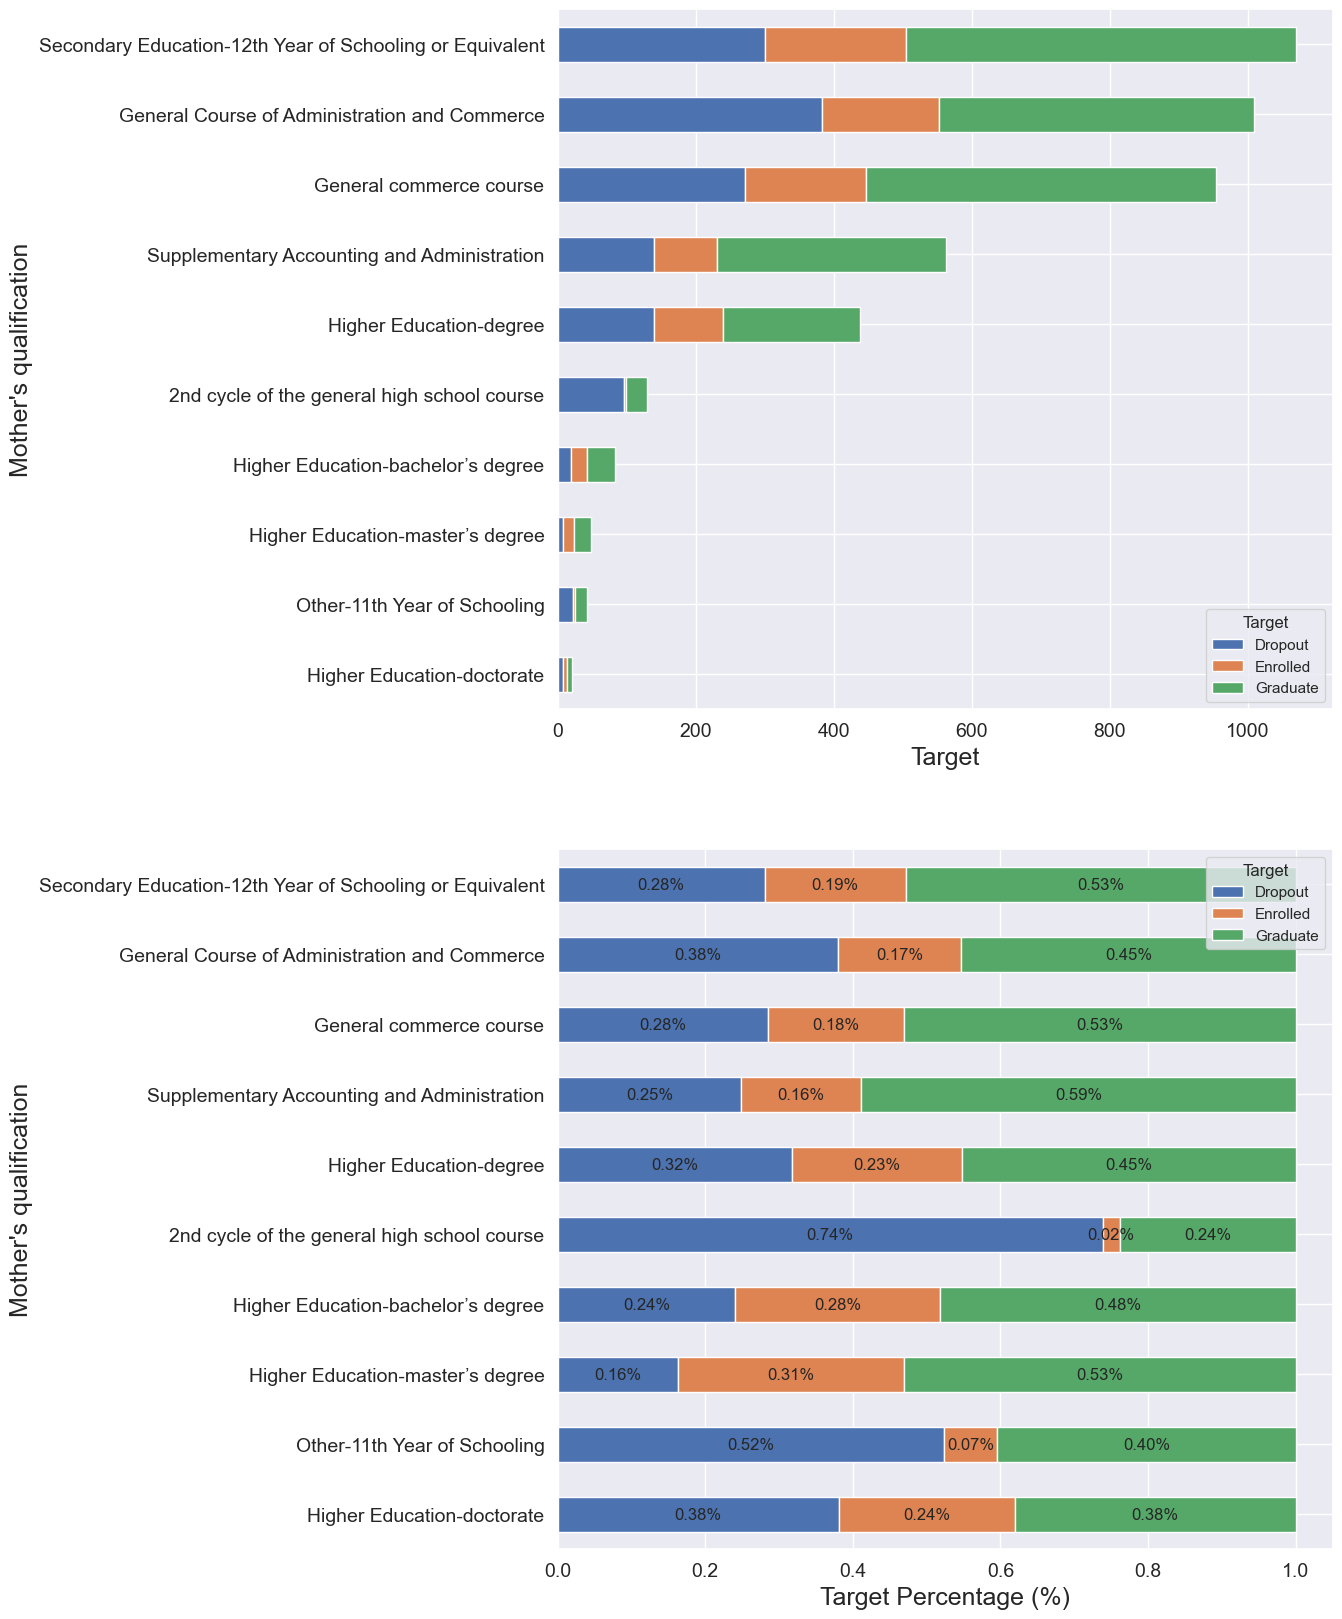

In [19]:
do_stacked_plot_cat("Mother's qualification")

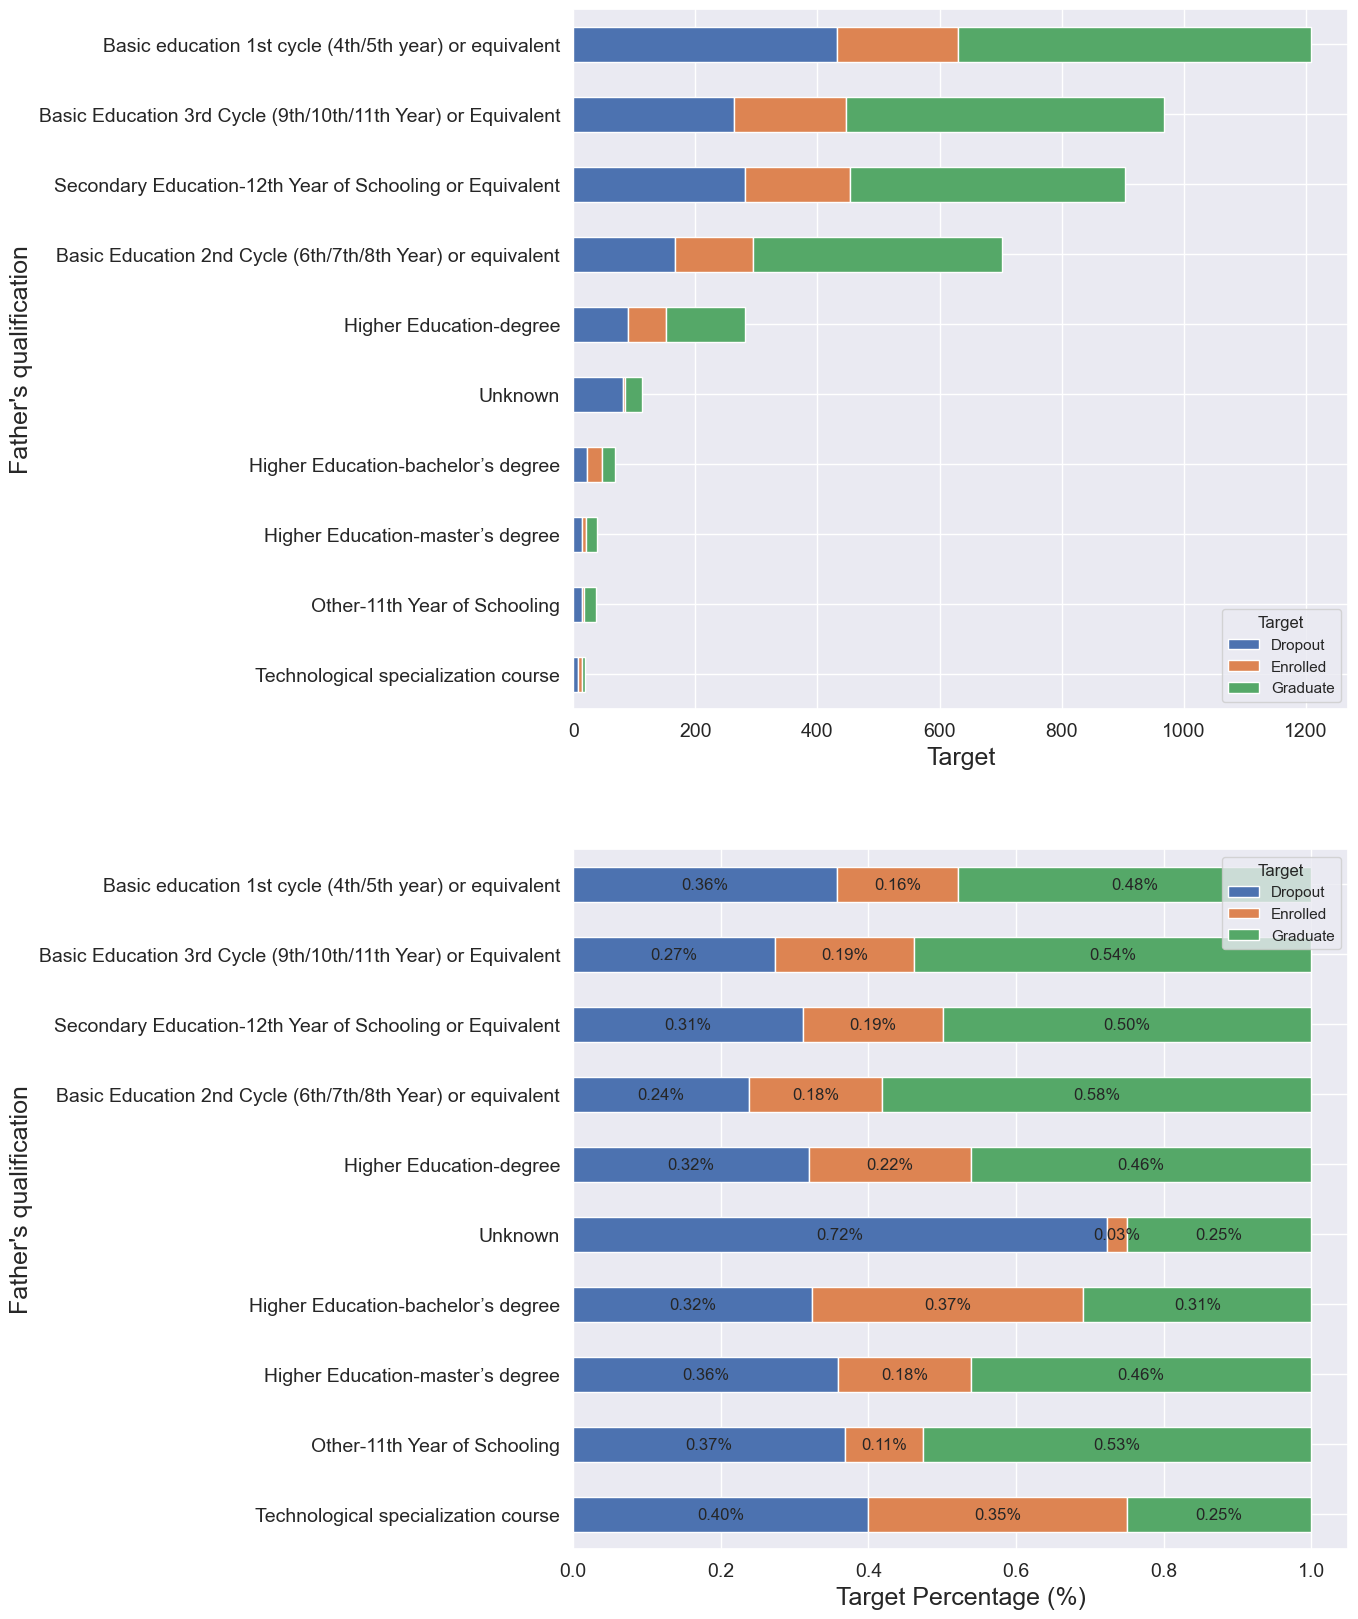

In [20]:
do_stacked_plot_cat("Father's qualification")

In general, qualification has little effect on the proportion of graduate or dropout.\
However more commonly attainable qualifications are obviously more abundant, resulting in a higher frequency for all targets.

Notably Mother's qualifications have higher frequency of Higher Education Degree, which matches up with the current student's gender distribution.

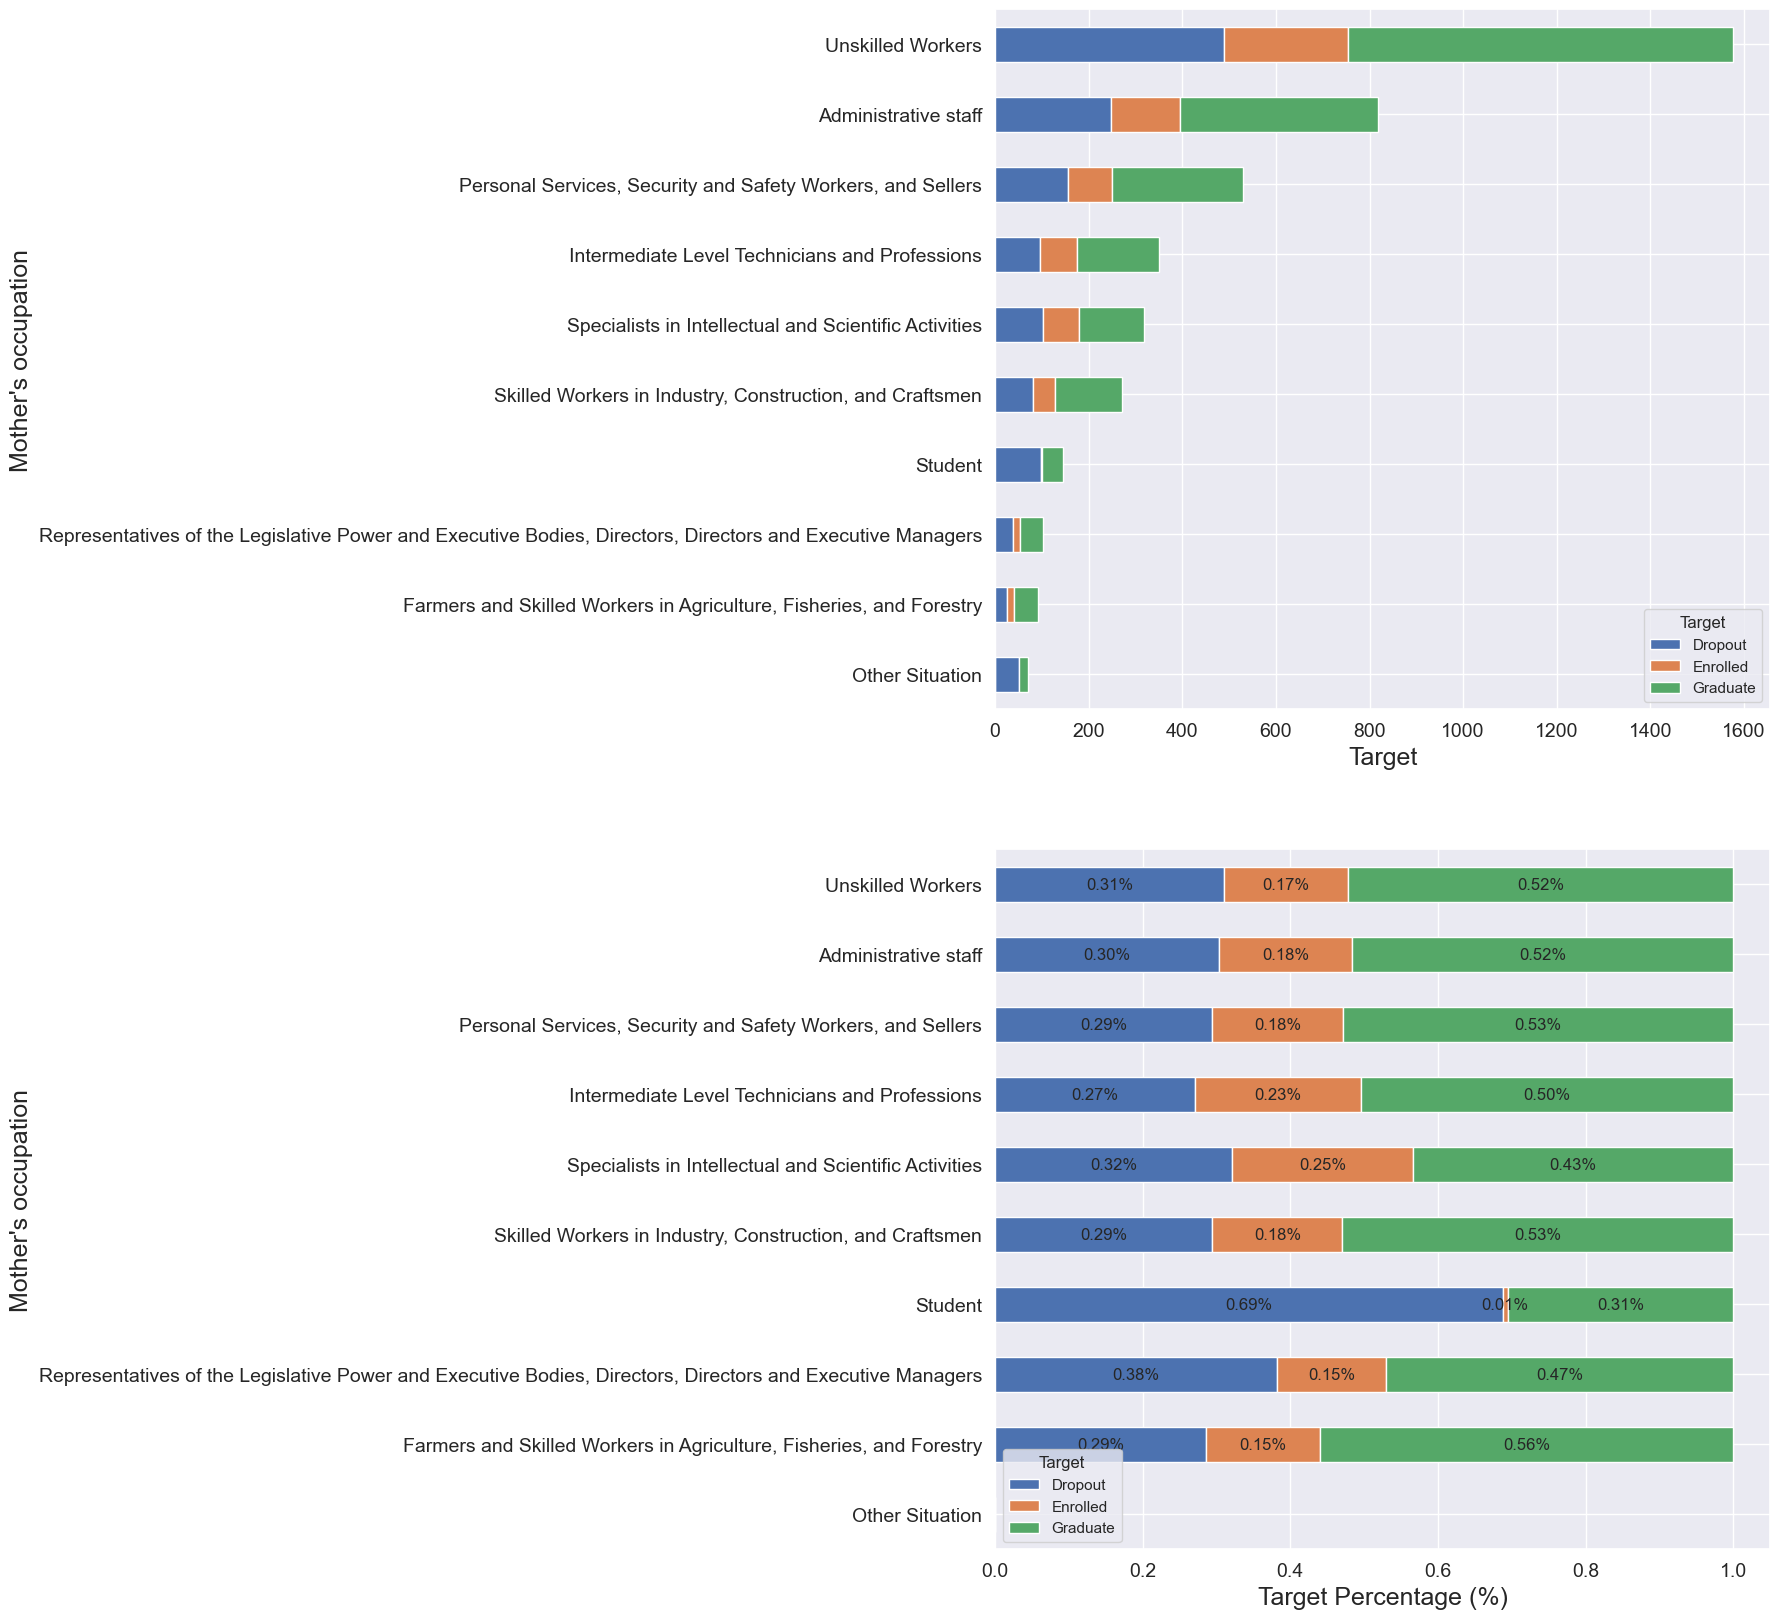

In [21]:
do_stacked_plot_cat("Mother's occupation")

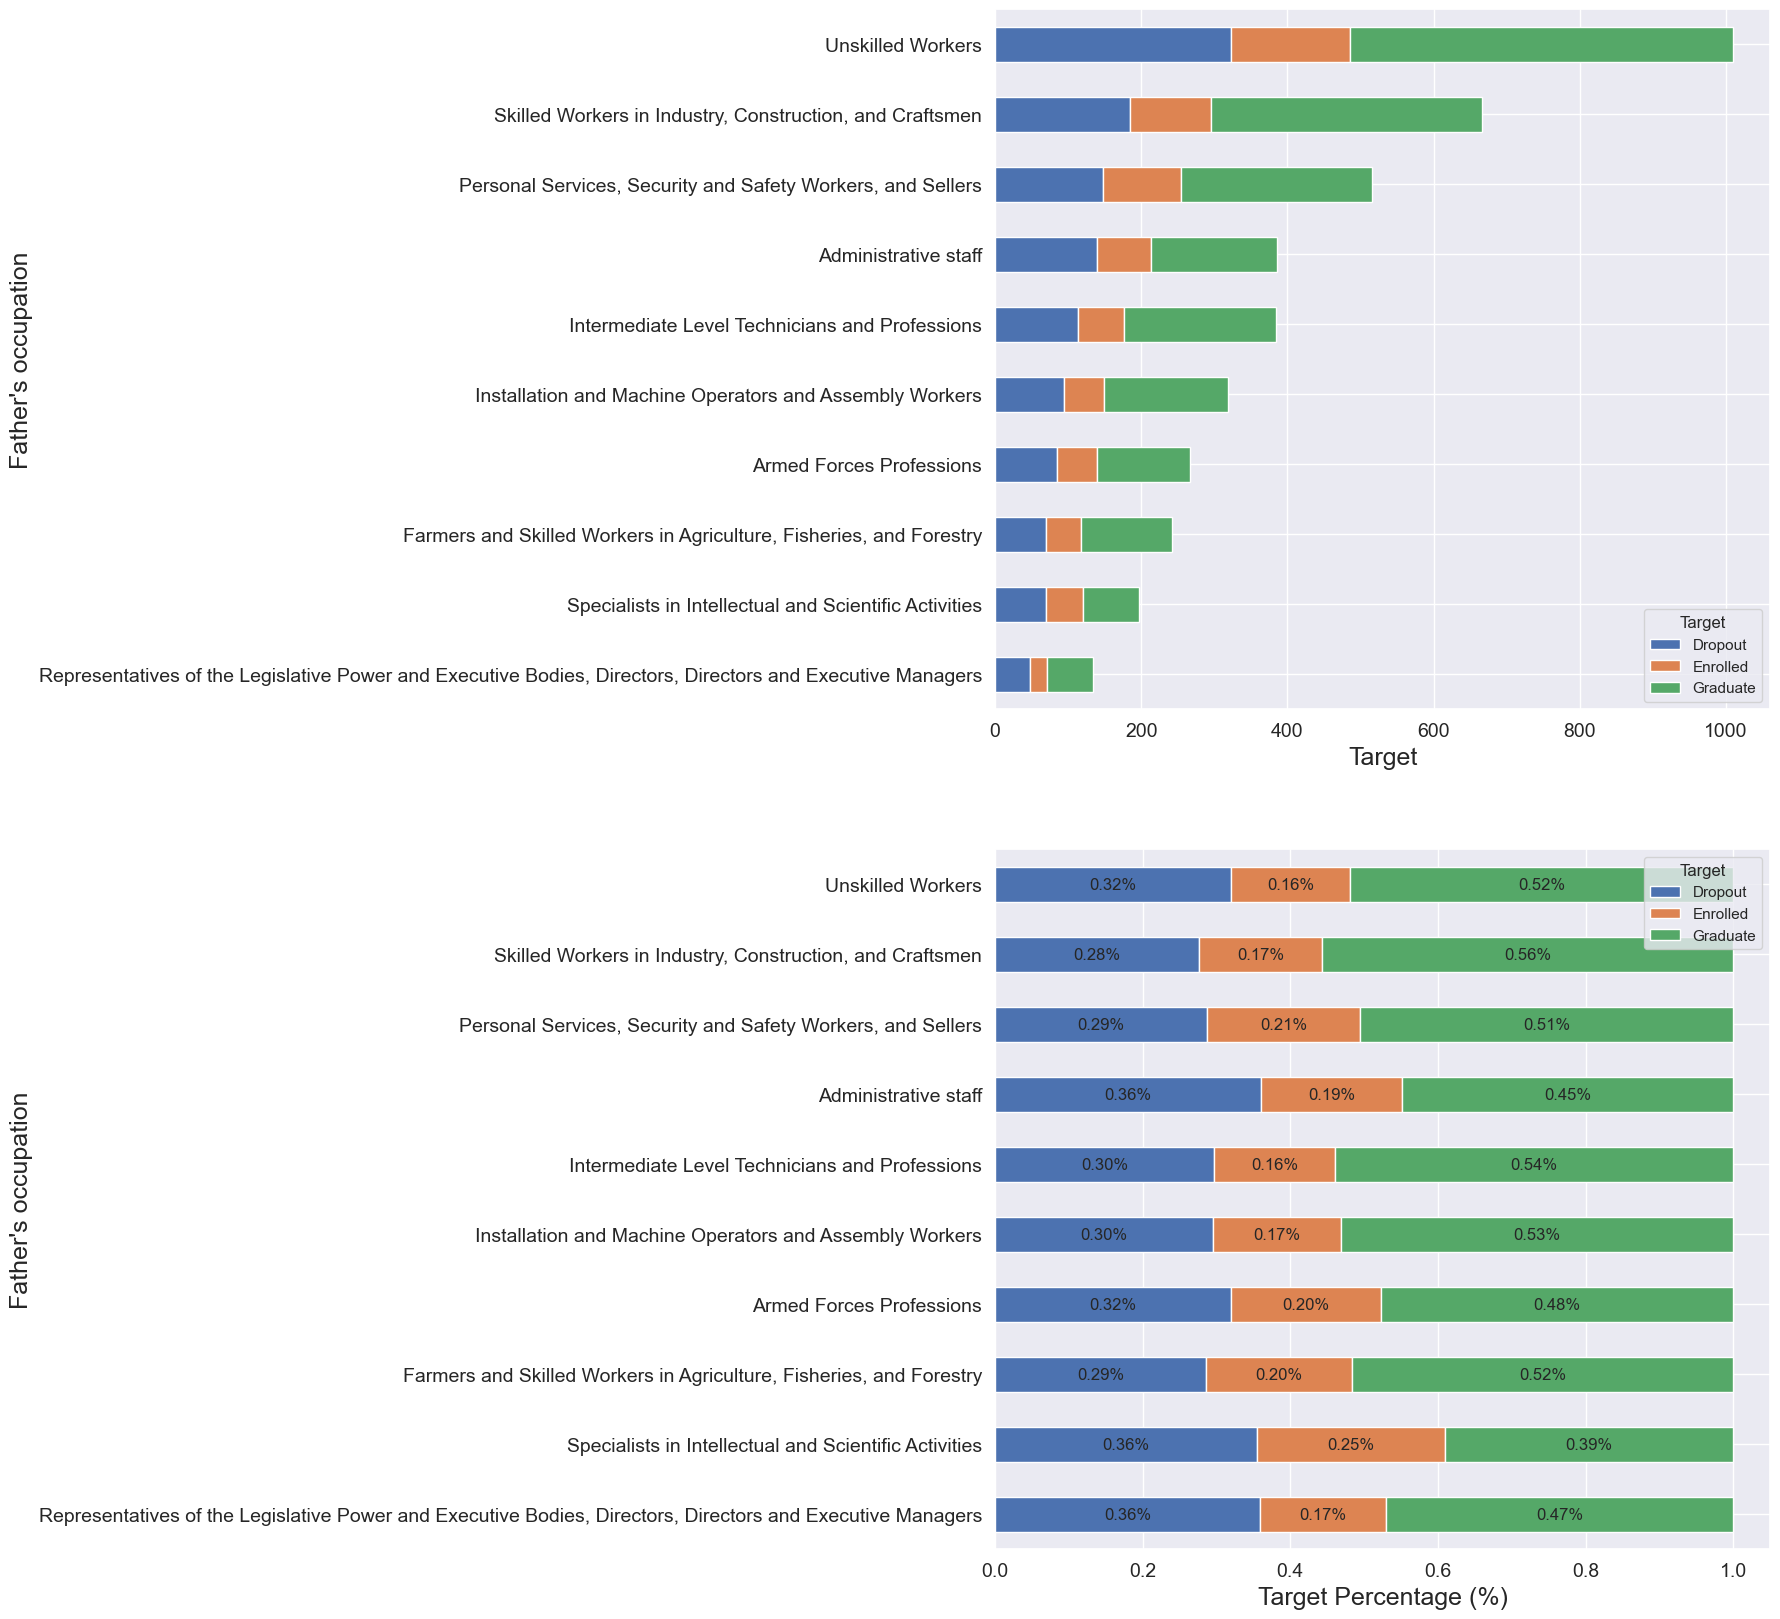

In [22]:
do_stacked_plot_cat("Father's occupation")

In [23]:
df[["Father's occupation", "Mother's occupation"]].corr()

,Father's occupation,Mother's occupation
Father's occupation,1.000000,0.724007
Mother's occupation,0.724007,1.000000


High correlation between father's and mother's occupation

Proportion of Graduates is generally higher in more common occupations.\
Notably, for mother's occupation, Student results in a high drop out proportion.

---
### Explore macroeconomic

In [24]:
# only include dropout and graduated separately
# including enrolment, is not indicative of any trend
# as we are trying to investigate if there are differences in trend between the targets
df_macro_dropout = df[df["Target"] == "Dropout"][["Unemployment rate","Inflation rate","GDP"]]
df_macro_graduate = df[df["Target"] == "Graduate"][["Unemployment rate","Inflation rate","GDP"]]

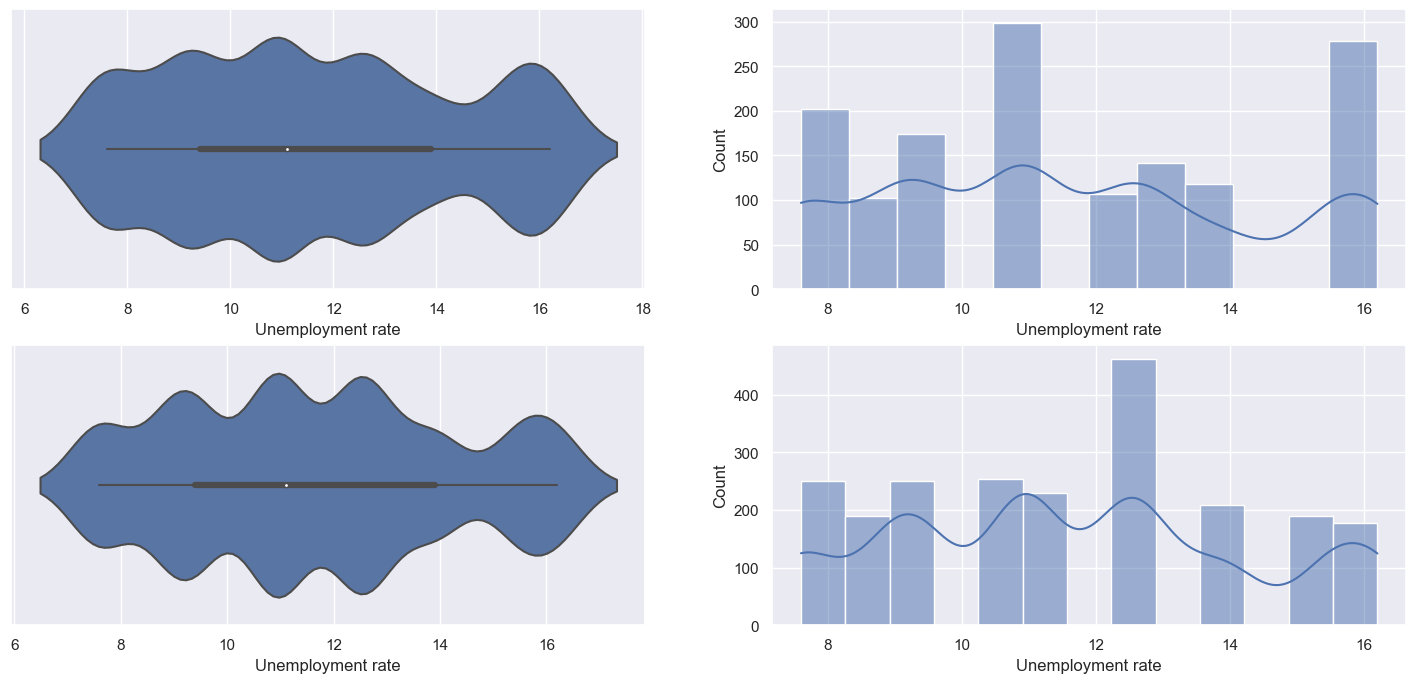

In [25]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate,"Unemployment rate")

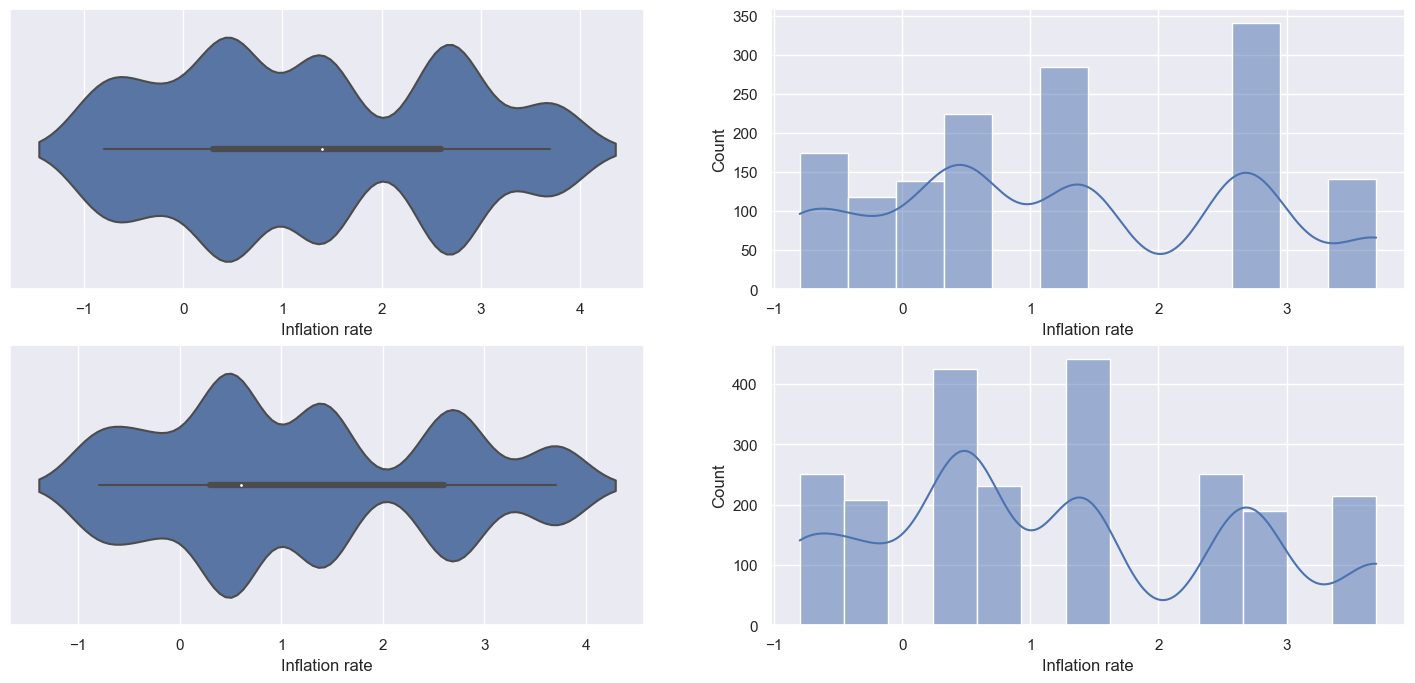

In [26]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate, "Inflation rate")

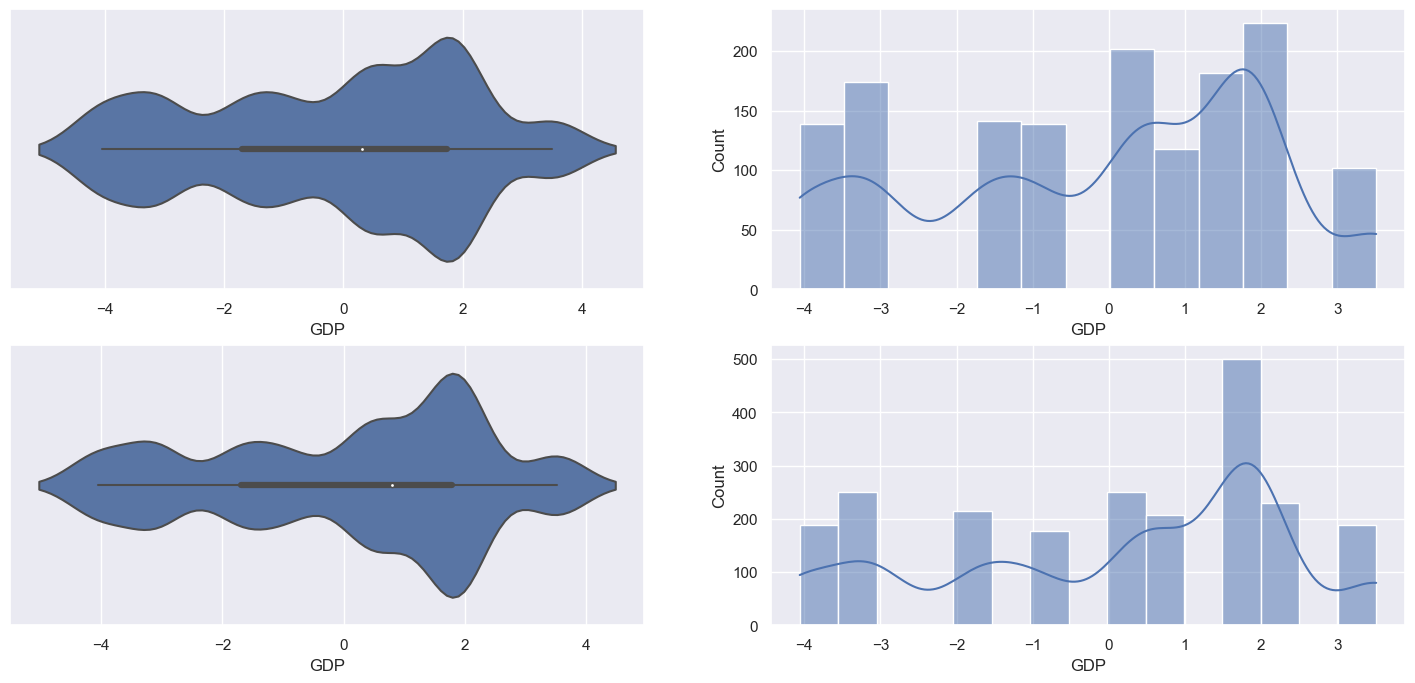

In [27]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate, "GDP")

No particular trend observed in macroeconomics.

<AxesSubplot:>

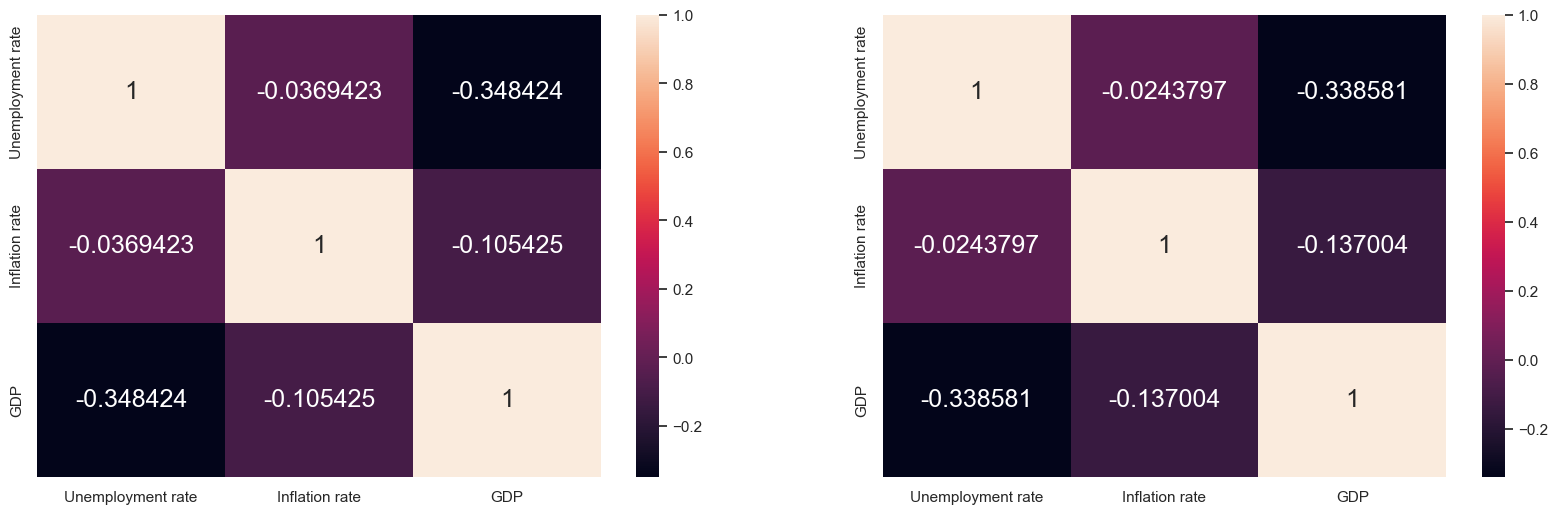

In [28]:
f,axes = plt.subplots(1,2,figsize=(20,6))
sb.heatmap(df_macro_dropout.corr(), annot = True, fmt = 'g', annot_kws = {"size": 18}, ax=axes[0])
sb.heatmap(df_macro_graduate.corr(), annot = True, fmt = 'g', annot_kws = {"size": 18}, ax=axes[1])

GDP slightly correlated to unemployment rate, but both heatmaps are similar and hence they do not act as differentiator for Target.

<AxesSubplot:xlabel='Unemployment rate', ylabel='Target'>

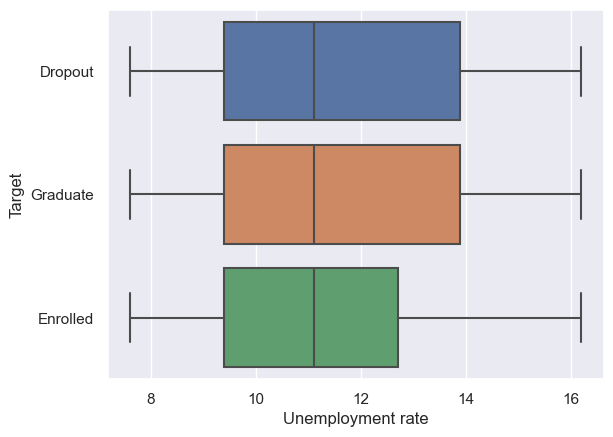

In [29]:
sb.boxplot(data=df, x="Unemployment rate", y="Target")

<AxesSubplot:xlabel='GDP', ylabel='Target'>

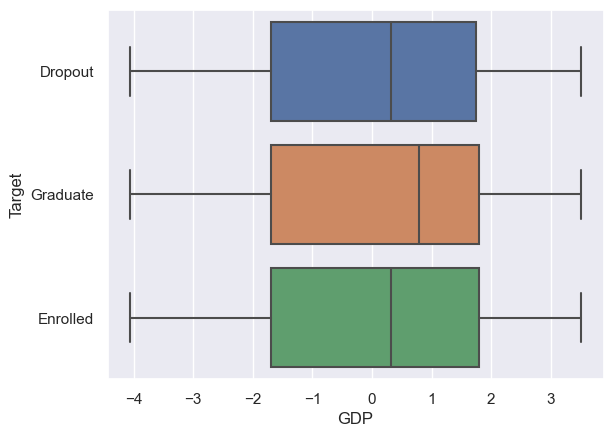

In [30]:
sb.boxplot(data=studentData, x="GDP", y="Target")

<AxesSubplot:xlabel='Inflation rate', ylabel='Target'>

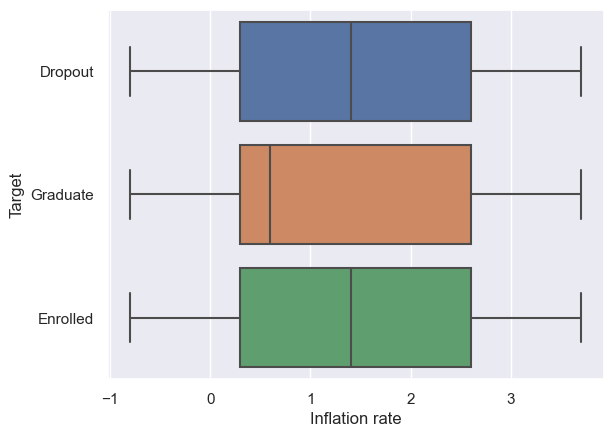

In [31]:
sb.boxplot(data=studentData, x="Inflation rate", y="Target")

No particular trend in macroeconomics

---

### Explore Academic data

In [32]:
convert_numeric_to_cat("Course")

{1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design',
 3: 'Social Service (evening attendance)',
 4: 'Agronomy',
 5: 'Communication Design',
 6: 'Veterinary Nursing',
 7: 'Informatics Engineering',
 8: 'Equiniculture',
 9: 'Management',
 10: 'Social Service',
 11: 'Tourism',
 12: 'Nursing',
 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management',
 15: 'Journalism and Communication',
 16: 'Basic Education',
 17: 'Management (evening attendance)'}

<AxesSubplot:xlabel='Target', ylabel='Course'>

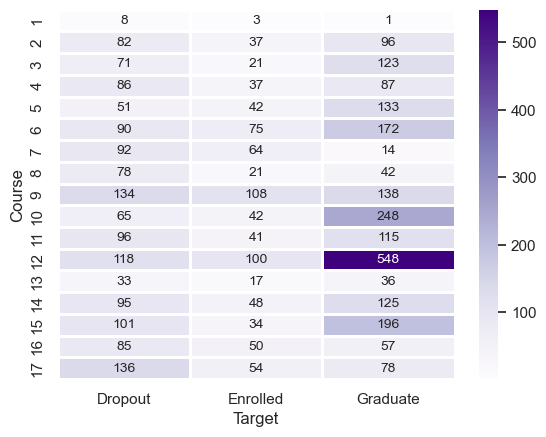

In [33]:
# Does being in different courses affect the dropout rate (success rate)
sb.heatmap(df.groupby(['Course', 'Target']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 10}, cmap = "Purples")

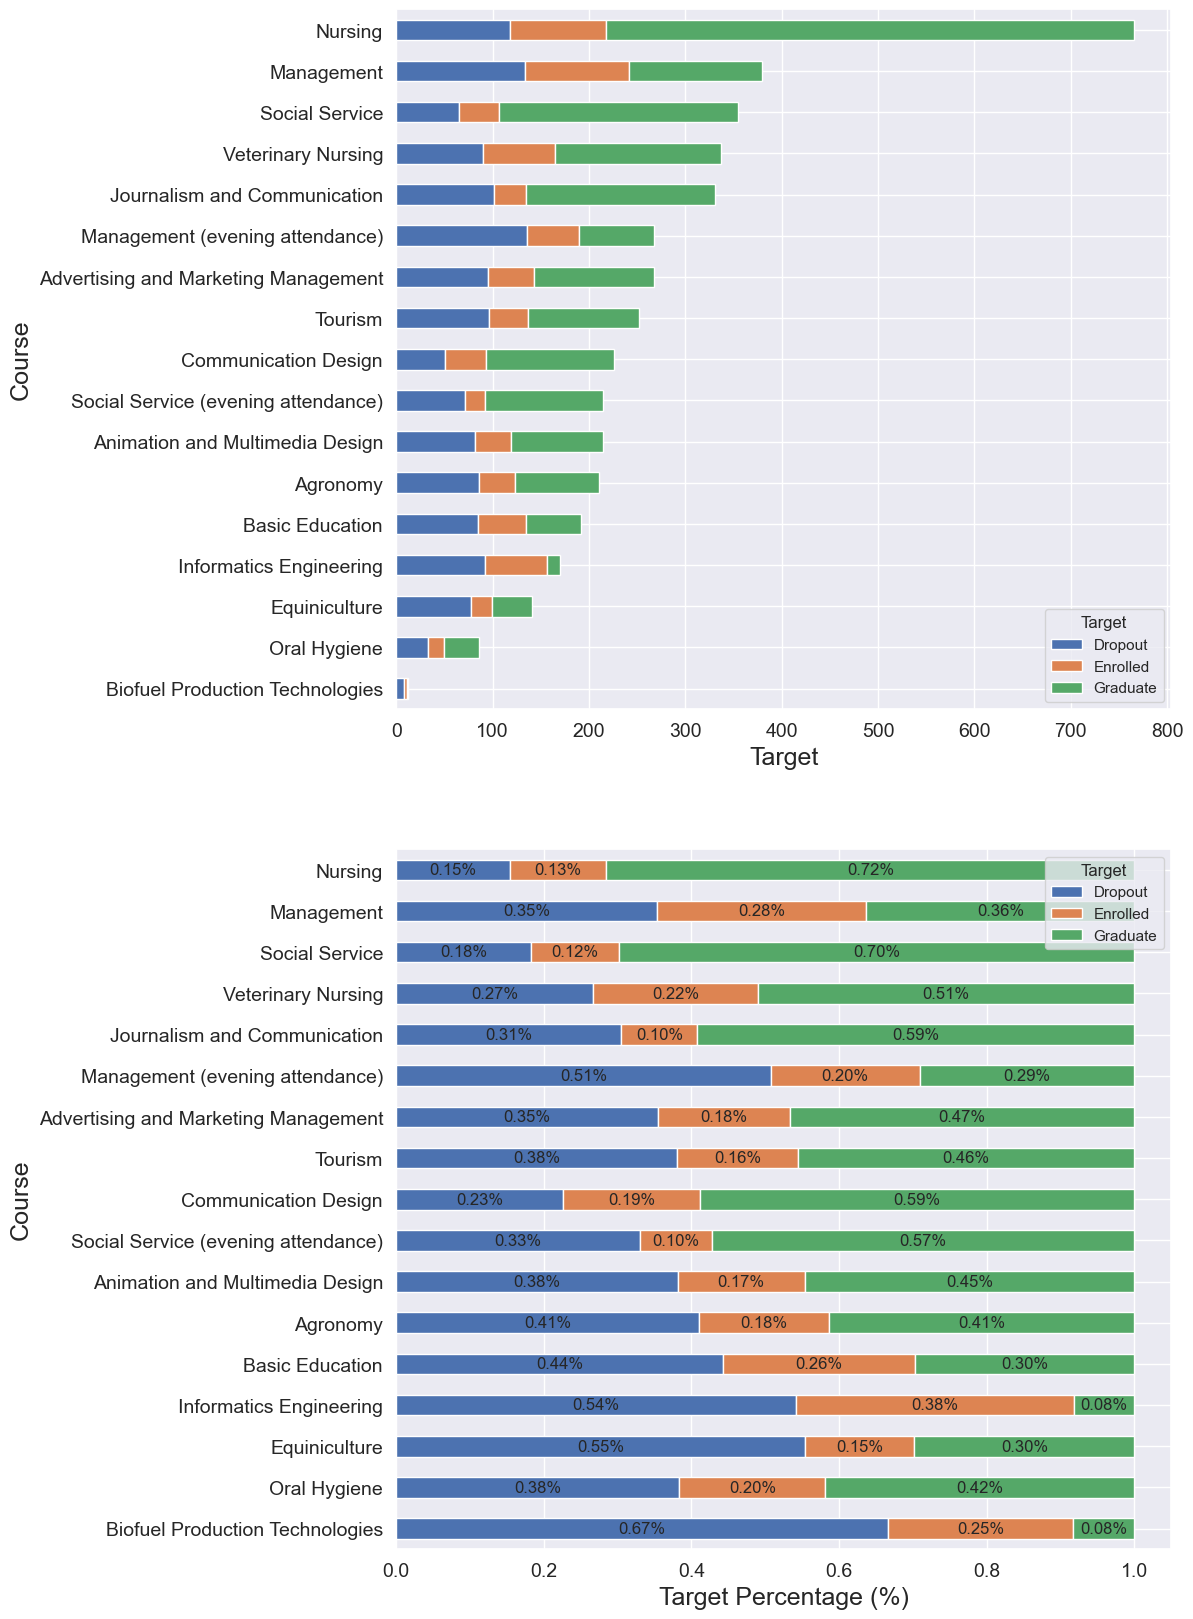

In [34]:
do_stacked_plot_cat("Course", 17)

Most of the Nursing students are Graduates.

<AxesSubplot:xlabel='Target', ylabel='Scholarship holder'>

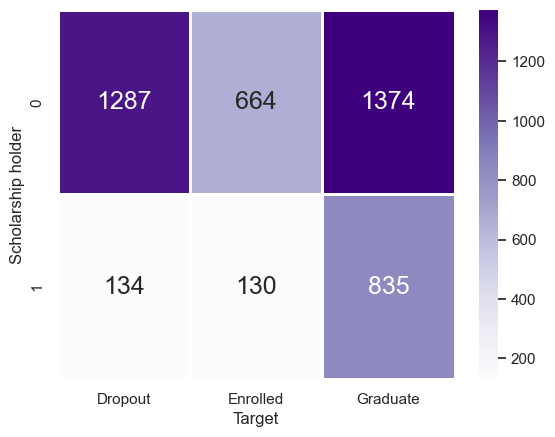

In [35]:
sb.heatmap(df.groupby(['Scholarship holder', 'Target']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "Purples")

 Out of 4424 students, 24.8% of the students are scholarship holders. Out of the Scholarship Holders, 12.2% of the students are Dropouts. 

<AxesSubplot:xlabel='Curricular units 1st sem (grade)', ylabel='Target'>

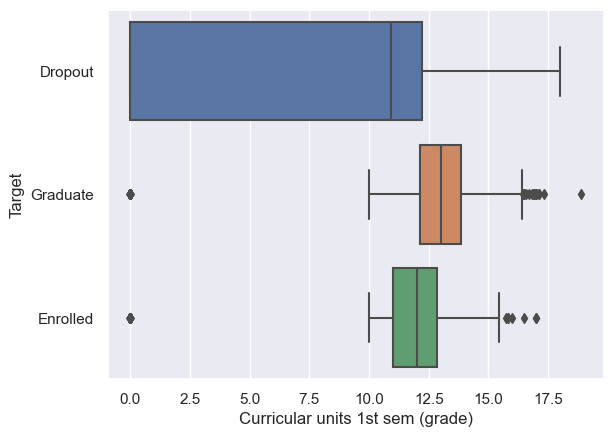

In [36]:
sb.boxplot(data=studentData, x="Curricular units 1st sem (grade)", y="Target")

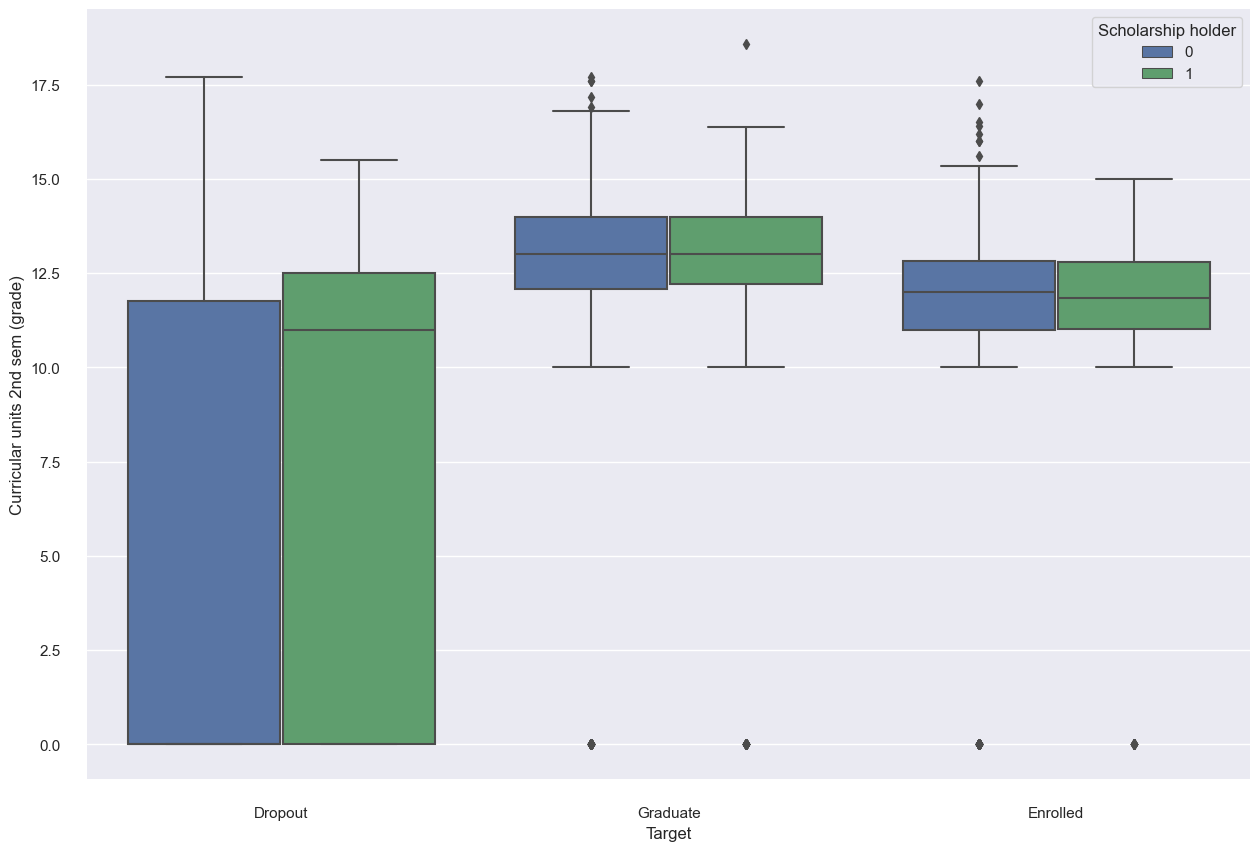

In [37]:
plt.figure(figsize=[15, 10])
sb.boxplot(x="Target", y="Curricular units 2nd sem (grade)",hue="Scholarship holder", palette=["b", "g"],data=studentData)
sb.despine(offset=10, trim=True)

Circular units might be used for classification, as below a certain grade there are more dropouts.\
Scholarship not a good differentiator.

---

# Data Prep : Anomaly Detection

We will attempt to remove anomalies and compare performance of our models later with and without anomalies.\
We will use try both Local Outlier Factor and Isolation Forest to remove anomalies, and inspect the resulting outliers and compare it to our expected knowledge from EDA. 

The apporpriate method will then be used to compare model performance with and without anomalies later.

In [38]:
# import libraries i need
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest

In [328]:
# function to prepare data for anomaly detection
def do_one_hot_encode(df, features, cat_features):
    #features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation", "Father's occupation", "Gender"]
    #cat_features = ["Target","Mother's occupation", "Father's occupation", "Marital status"]   
    anomDf = df[features].copy()

    # change to names
    for col in cat_features:
        anomDf[col].replace(convert_numeric_to_cat(col), inplace=True)
        
    # combine certain minority categories
    anomDf["Marital status"][(anomDf["Marital status"] != "Single") & (anomDf["Marital status"] != "Married")] = "Others"
    anomDf["Mother's occupation"][(anomDf["Mother's occupation"] != "Student") & (anomDf["Mother's occupation"] != "Unskilled Workers")] = "Others"
      
    # one hot encode
    anomDf_ohe = anomDf[cat_features]
    ohe = OneHotEncoder()
    ohe.fit(anomDf_ohe)
    anomDf_ohe = pd.DataFrame(ohe.transform(anomDf_ohe).toarray(), columns=ohe.get_feature_names_out(anomDf_ohe.columns))
    
    anomDf_ohe["Curricular units 1st sem (grade)"] = anomDf["Curricular units 1st sem (grade)"]
     
    return anomDf, anomDf_ohe

### Expetations from EDA Observations

From EDA, we expect the following from our differentiators.

`Marital Status` : Higher chance to dropout if Married, Lower chance if Single.

`Curricular units 1st sem (grade)` : lower grades tend to dropout. (2nd sem is highly correlated so it is not included).

`Mother's occupation` : Occuupation as Student highly likely to dropout.

`Gender` :  Females have a lower proportion of Dropouts

### Using Local Outlier Factor

In [329]:
def remove_anomaly_lof(df, n_neighbours = 10, plot = False):
    features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation", "Gender"]  
    cat_features = ["Mother's occupation", "Marital status"]
    
    anomDf, anomDf_ohe = do_one_hot_encode(df, features, cat_features)
    # build model
    model = LocalOutlierFactor(n_neighbors=n_neighbours, contamination="auto")
    
    # Merge Target Dataframe and anomDf_dataframe before fitting the model
    #df_target = df['Target']
    #anom_ohe_all = pd.concat([anomDf_ohe, df_target], ignore_index=True, sort=False)
    
    # fit model
    pred = model.fit_predict(X=anomDf_ohe)
    neg_outlier_factor = model.negative_outlier_factor_
    
    if plot:
        f,axes = plt.subplots(1,2,figsize=(20,5))
        ax = sb.countplot(x=pred, ax=axes[0])
        ax.set_title("Predictor", fontsize=18)
        ax = sb.boxplot(x=neg_outlier_factor, ax=axes[1])
        ax.set_title("Negative Outlier Factor", fontsize=18)
    
    return anomDf, pred, neg_outlier_factor

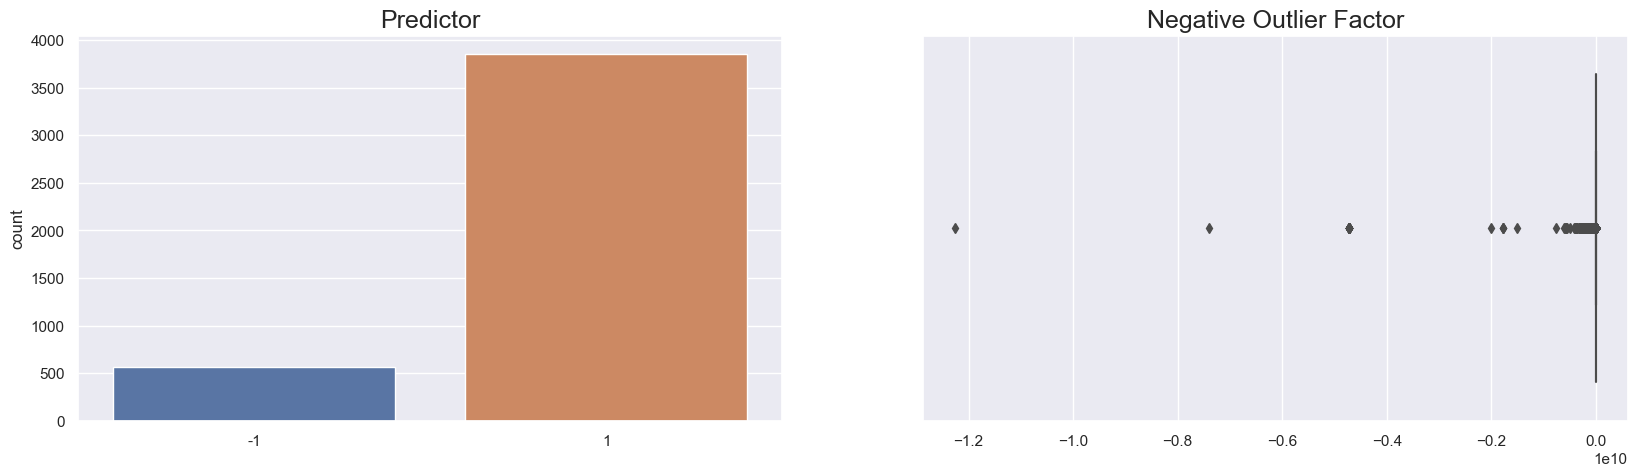

In [330]:
df = studentData.copy()
anomDf, pred, factor = remove_anomaly_lof(df, 15, True)

In [331]:
outlierDf = anomDf[pred == -1].copy()
outlierDf.count()

Target                              569
Marital status                      569
Curricular units 1st sem (grade)    569
Mother's occupation                 569
Gender                              569
dtype: int64

In [332]:
# visually inspect outliers, seem correct
# checking for the following expected outlier:
# mother is student and graduate
cond = (outlierDf["Mother's occupation"] == "Student") & (outlierDf["Target"] == "Graduate")
print(outlierDf[cond].count())
outlierDf[cond].head(20)

Target                              14
Marital status                      14
Curricular units 1st sem (grade)    14
Mother's occupation                 14
Gender                              14
dtype: int64


,Target,Marital status,Curricular units 1st sem (grade),Mother's occupation,Gender
696,Graduate,Married,13.666667,Student,1
948,Graduate,Married,11.400000,Student,1
970,Graduate,Single,13.750000,Student,1
1550,Graduate,Married,12.687500,Student,0
2413,Graduate,Married,11.800000,Student,0
2680,Graduate,Others,12.526087,Student,1
2818,Graduate,Married,12.666667,Student,0
2890,Graduate,Married,13.750000,Student,0
2913,Graduate,Single,14.375000,Student,0
2987,Graduate,Married,13.333333,Student,0


Looks like a reasonable result, rows obtained do look like anomalies, and the count is reasonable.

### Using Isolation Forest

In [385]:
def remove_anomaly_iforest(df, n_estimators = 100, plot = False):
    #features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation", "Gender", "Father's occupation"]  
    #cat_features = ["Mother's occupation", "Marital status", "Target"]
    features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation", "Gender", "Father's occupation"]  
    cat_features = ["Mother's occupation", "Marital status", "Father's occupation"]

    anomDf, anomDf_ohe = do_one_hot_encode(df, features, cat_features)
    # build model
    model = IsolationForest(n_estimators=n_estimators, contamination=0.1, random_state=888)
    
    # fit model
    pred = model.fit(X=anomDf_ohe.values).predict(anomDf_ohe.values)
    
    if plot:
        #f,axes = plt.subplots(1,2,figsize=(20,5))
        ax = sb.countplot(x=pred)
        ax.set_title("Predictor", fontsize=18)
        #ax = sb.boxplot(x=factor, ax=axes[1])
        #ax.set_title("Negative Outlier Factor", fontsize=18)
        print("Anomaly count")
        print(anomDf[pred == -1].count())
    
    return anomDf, anomDf_ohe, pred

Anomaly count
Target                              443
Marital status                      443
Curricular units 1st sem (grade)    443
Mother's occupation                 443
Gender                              443
Father's occupation                 443
dtype: int64


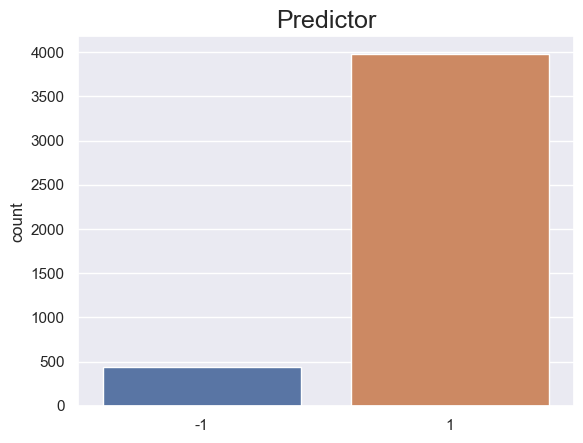

In [386]:
anomDf, anomDf_ohe, pred = remove_anomaly_iforest(df, 100, True)

In [387]:
outlierDf = anomDf[pred == -1].copy()
cond = (outlierDf["Mother's occupation"] == "Student") & (outlierDf["Target"] == "Graduate")
print(outlierDf[cond].count())
outlierDf[cond].head(20)

Target                              36
Marital status                      36
Curricular units 1st sem (grade)    36
Mother's occupation                 36
Gender                              36
Father's occupation                 36
dtype: int64


,Target,Marital status,Curricular units 1st sem (grade),Mother's occupation,Gender,Father's occupation
205,Graduate,Single,11.000000,Student,0,Student
284,Graduate,Single,12.800000,Student,0,Student
385,Graduate,Single,11.500000,Student,0,Student
467,Graduate,Single,13.000000,Student,0,Student
512,Graduate,Single,12.500000,Student,0,Student
663,Graduate,Single,12.000000,Student,0,Student
696,Graduate,Married,13.666667,Student,1,Student
885,Graduate,Single,12.200000,Student,0,Student
886,Graduate,Single,13.166667,Student,0,Student
948,Graduate,Married,11.400000,Student,1,Student


Looks reasonable as well, can perhaps combine both if model performance improves.

---

# Creating KNN Model 

In [336]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [337]:
c_StudentD = studentData.copy()
c_StudentD.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [338]:
df_knn = c_StudentD[["Marital status","Mother's occupation","Gender", "Father's occupation",
            "Curricular units 1st sem (grade)" , "Target"]].copy()

### Data Preparation (Balancing)

In [339]:
target_dropout = df_knn[df_knn["Target"] == 'Dropout']
target_graduate = df_knn[df_knn["Target"] == 'Graduate']
target_enrolled = df_knn[df_knn["Target"] == 'Enrolled']
 
# Upsample the dropout samples
target_dropout_up = resample(target_dropout, 
                        replace=True,
                        n_samples=target_graduate.shape[0])
target_enrolled_up = resample(target_enrolled, 
                        replace=True,
                        n_samples=target_graduate.shape[0])
 
# Combine the two classes back after upsampling
df_knn = pd.concat([target_dropout_up, target_graduate, target_enrolled_up])
 
df_knn.reset_index(inplace=True)

# Check the ratio of the classes
df_knn["Target"].value_counts()

Dropout     2209
Graduate    2209
Enrolled    2209
Name: Target, dtype: int64

### Data Preparation (Scaling and OHE)

In [379]:
# create a dataframe with only Predictors: Marital status, Mother's occupation, 
# Father's occupation, Gender, Curricular units 1st sem (grade)

features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation", "Gender", "Father's occupation"]  
cat_features = ["Mother's occupation", "Marital status", "Father's occupation"]

X_orig, X = do_one_hot_encode(df_knn, features, cat_features)
#separate target value
y = df_knn['Target'].values

In [380]:
# Standardization of Curricular units 1st sem (grade)
scale = StandardScaler()
X[["Curricular units 1st sem (grade)"]] = scale.fit_transform(X[["Curricular units 1st sem (grade)"]])
X.head()

,Mother's occupation_Others,Mother's occupation_Student,Mother's occupation_Unskilled Workers,Marital status_Married,Marital status_Others,Marital status_Single,Father's occupation_(blank),Father's occupation_Administrative staff,Father's occupation_Armed Forces Officers,Father's occupation_Armed Forces Professions,...,Father's occupation_Street vendors (except food) and street service providers,Father's occupation_Student,Father's occupation_Teachers,Father's occupation_Technicians and professionals of intermediate level of health,Father's occupation_Unskilled Workers,"Father's occupation_Unskilled workers in agriculture, animal production, and fisheries and forestry","Father's occupation_Unskilled workers in extractive industry, construction, manufacturing, and transport",Father's occupation_Vehicle drivers and mobile equipment operators,"Father's occupation_Workers in food processing, woodworking, and clothing and other industries and crafts",Curricular units 1st sem (grade)
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.179904
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265665
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363678
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231360
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025534


### K-Nearest-Neighbors (k-NN) Model with Anomalies

In [381]:
# Split dataset into train (80%) and test data (20%)
# Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [382]:
# Create KNN classifier and start off n_neighbours as 3 (Later we will update it)
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn_model.fit(X_train,y_train)

#show the model predictions on the test data
knn_model.predict(X_test)

array(['Graduate', 'Enrolled', 'Enrolled', ..., 'Graduate', 'Graduate',
       'Enrolled'], dtype=object)

In [383]:
#check accuracy of the model on the test data
knn_model.score(X_test, y_test)

0.6244343891402715

The model accuracy started off with 62.44% which is good but can be better.

### K-Fold Cross-Validation.

K-fold Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data and to avoid overfitting

In [384]:
#create a new KNN model
knn_with_cv5 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5
cv_scores = cross_val_score(knn_with_cv5, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean for cv = 5 :{}'.format(np.mean(cv_scores)))

#create a new KNN model
knn_with_cv10 = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10
cv_scores = cross_val_score(knn_with_cv10, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
print(" ")
print(cv_scores)
print('cv_scores mean cv = 10 :{}'.format(np.mean(cv_scores)))

[0.60697455 0.59056604 0.59339623 0.58584906 0.60566038]
cv_scores mean for cv = 5 :0.59648925008447
 
[0.62900188 0.62641509 0.61509434 0.61320755 0.59245283 0.60188679
 0.58113208 0.61132075 0.63962264 0.58867925]
cv_scores mean cv = 10 :0.6098813203993888


With Cross-validation, the model's accuracy is about 57.04% for splitting the training dataset into 5 parts and accuracy increased to 58.47% for splitting in 10 parts.

### Hypertuning model parameters using GridSearchCV

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.

In [422]:
#create new a knn model
knn_with_gridS = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 30)}

# use gridsearch to test all values for n_neighbors
# We are using cv as 10 because the accuracy is better compared to cv 5
knn_gscv = GridSearchCV(knn_with_gridS, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

{'n_neighbors': 2}


0.6104477134633834

In [423]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn_model.fit(X_train,y_train)

#show the model predictions on the test data
y_pred = knn_model.predict(X_test)

#check accuracy of the model on the test data
knn_model.score(X_test, y_test)

0.6478129713423831

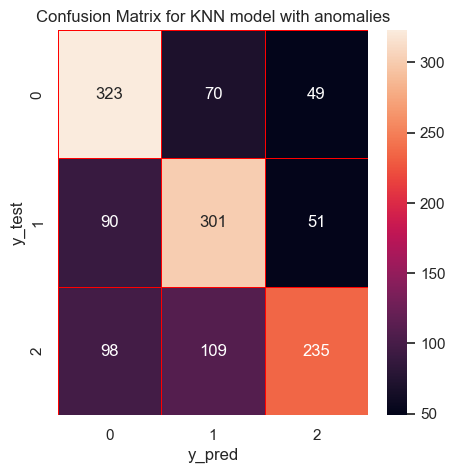

In [424]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sb.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix for KNN model with anomalies")
plt.show()

In [426]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.6478129713423831
Precision:  0.6535566013701877
Recall:  0.6478129713423831
F1-score:  0.6452261375906994


### Conclusion for the model (with anomalies)
First, we started off with splitting the training and test dataset. We fit the model with just random split and no hyperparameter tuning. The mean accuracy from this model was 61.61%.

Next, in order to prevent overfitting and to ensure the model will perform well on unseen data, we did cross-validation. Then, we wanted to find the optimal value for 'n_neighbours', we did GridSearch and through this we found out the optimal value to be 1. 

Lastly, we fit the model on the training set and the mean accuracy we got from this model was 62.82% which indicates a slightly better model.

### K-Nearest-Neighbors (k-NN) Model without Anomalies

Anomaly count
Target                              661
Marital status                      661
Curricular units 1st sem (grade)    661
Mother's occupation                 661
Gender                              661
Father's occupation                 661
dtype: int64


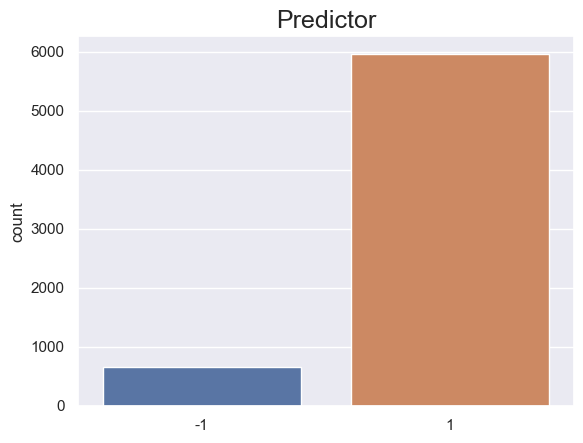

In [393]:
# Same as the previous model but without anomalies

features = ["Target", "Marital status","Mother's occupation","Father's occupation","Gender",
            "Curricular units 1st sem (grade)"]
cat_features = ["Marital status","Mother's occupation","Father's occupation"]

# Removing the anomalies using the Isolation Forest Model
df_knn_anomaly_removed, df_knn_removed_ohe, pred = remove_anomaly_iforest(df_knn, 100, True)

# Separating the y and x
y_anom = df_knn_anomaly_removed['Target'].values
X_anom = df_knn_removed_ohe

# Scaling of Curricular units 1st sem (grade)
scale = StandardScaler()
X[["Curricular units 1st sem (grade)"]] = scale.fit_transform(X[["Curricular units 1st sem (grade)"]])

In [389]:
X_anom.head

<bound method NDFrame.head of       Mother's occupation_Others  Mother's occupation_Student  \
0                            1.0                          0.0   
1                            1.0                          0.0   
2                            1.0                          0.0   
3                            1.0                          0.0   
4                            1.0                          0.0   
...                          ...                          ...   
6622                         1.0                          0.0   
6623                         0.0                          0.0   
6624                         1.0                          0.0   
6625                         1.0                          0.0   
6626                         0.0                          0.0   

      Mother's occupation_Unskilled Workers  Marital status_Married  \
0                                       0.0                     0.0   
1                                       0.0    

In [390]:
# Split dataset into train (80%) and test data (20%)
# Setting ‘random_state’ to 22 ensures that we get the same split each time so we can reproduce our results.
X_train_anom, X_test_anom, y_train_anom, y_test_anom = train_test_split(X_anom, y_anom, test_size=0.2, random_state=22)

# Create KNN classifier and start off n_neighbours as 1 (from the previous model)
knn_model_2 = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn_model_2.fit(X_train_anom, y_train_anom)

#show the model predictions on the test data
knn_model_2.predict(X_test_anom)

array(['Enrolled', 'Dropout', 'Graduate', ..., 'Enrolled', 'Dropout',
       'Dropout'], dtype=object)

### K-Fold Cross-Validation.

In [391]:
#create a new KNN model without anomaly
knn_with_cv5_na = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5
cv_scores = cross_val_score(knn_with_cv5_na, X_train_anom, y_train_anom, cv=5,  error_score='raise')
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean for cv = 5 :{}'.format(np.mean(cv_scores)))

#create a new KNN model without anomaly
knn_with_cv10_na = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10
cv_scores = cross_val_score(knn_with_cv10_na, X_train_anom, y_train_anom, cv=10)
#print each cv score (accuracy) and average them
print(" ")
print(cv_scores)
print('cv_scores mean cv = 10 :{}'.format(np.mean(cv_scores)))

[0.59095193 0.59150943 0.5745283  0.54528302 0.59528302]
cv_scores mean for cv = 5 :0.5795111411448793
 
[0.63276836 0.63584906 0.58679245 0.60377358 0.60188679 0.58679245
 0.57358491 0.53962264 0.56415094 0.64150943]
cv_scores mean cv = 10 :0.5966730625732865


### Hypertuning model parameters using GridSearchCV

In [392]:
#create new a knn model
knn_with_gridS = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_with_gridS, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X_train_anom, y_train_anom)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

{'n_neighbors': 1}


0.6347809401982731

In [394]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn_model.fit(X_train_anom,y_train_anom)

#show the model predictions on the test data
y_pred_anom = knn_model.predict(X_test_anom)

#check accuracy of the model on the test data
knn_model.score(X_test_anom, y_test_anom)

0.6251885369532428

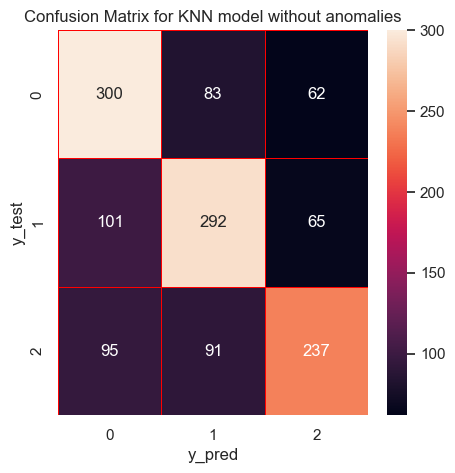

In [395]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_anom, y_pred_anom)

f, ax =plt.subplots(figsize = (5,5))

sb.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix for KNN model without anomalies")
plt.show()

In [427]:
print("Accuracy: ", accuracy_score(y_test_anom, y_pred))
print("Precision: ", precision_score(y_test_anom, y_pred,average='weighted'))
print("Recall: ", recall_score(y_test_anom, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test_anom, y_pred, average='weighted'))

Accuracy:  0.31825037707390647
Precision:  0.3149149688263396
Recall:  0.31825037707390647
F1-score:  0.31486904498924434


## Conclusion about the model without anomalies

Firstly, we created a dataframe without any anomalies. Then we proceeded to spit into training and test dataset. Then we did K-Fold cross validation on the training set. 

After using GridSearch, we realised the optimal value for 'n_neighbours' is 1. Then, we build the model and fit it to the training set and predicted the model accuracy score which is 62.51%. 

From the KNN model with the removed anomaly above, we assumed that the accuracy is going to be higher than the first knn model (without anomalies) we created. However, even though the model was being trained on a 'perfect' data without any anomalies, the accuracy for the second model (without anomalies) is lower than for the first model (with anomalies). This is a surprising fact.

Then, we wanted to test it out on the previously used test data for the KNN model (with anomalies).

0.37858220211161386


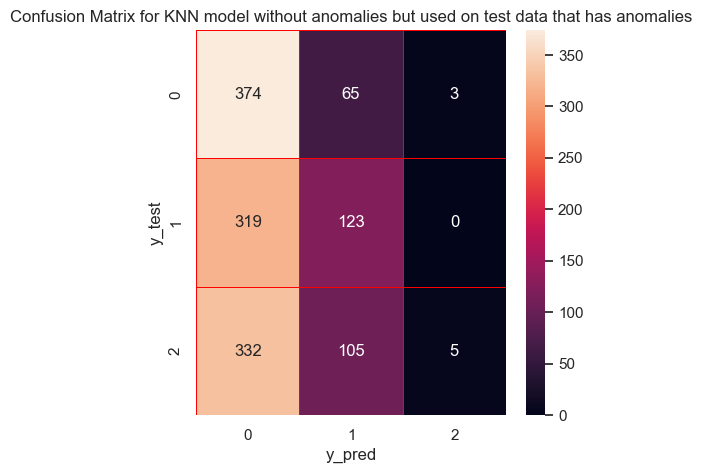

In [396]:
# Now let's test the data on the previous test data set which has included anomaly

#show the model predictions on the previous test data
y_pred_anom_with_anomTestset = knn_model.predict(X_test)

#check accuracy of the model on the previous test data
print(knn_model.score(X_test, y_test))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_anom_with_anomTestset)

f, ax =plt.subplots(figsize = (5,5))

sb.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix for KNN model without anomalies but used on test data that has anomalies")
plt.show()

**Conclusion**

After testing the second KNN model (without anomalies) on the test data with some anomalies, the accuracy decreased to 37.86%. This was expected because the KNN model (without anomalies) has been trained on a 'perfect' dataset which has not been trained on any form of anomalies so the model assumes perfect data all the way. However, when suddenly the model was tested on a test dataset which included some anomalies, the accuracy decreased. 

# Multi-Variate Classification Tree with anomalies
The third model we will use is Multi-Variate Decision Tree Classifier model, once again we will compare the performance of this model with and without anomalies.  

The predictors that seemingly have the most impact on predicting whether the student will dropout or not are Marital Status, Gender, Father's occupation and Mother's occupation. Hence, based on these predictors, we will set up the respective multi-variate classification tree and observe the response to confirm or deny this assumption. 

Response Variable : **Target**     
Predictor Feature : **Marital status, Gender, Father's occupation, Mother's occupation**  

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [286]:
# Extract Response and Predictors
y = pd.DataFrame(studentData["Target"].astype('category'))
X = pd.DataFrame(studentData[["Marital status", "Gender", "Father's occupation", "Mother's occupation"]])

Train Set : (3318, 1) (3318, 4)
Test Set  : (1106, 1) (1106, 4)


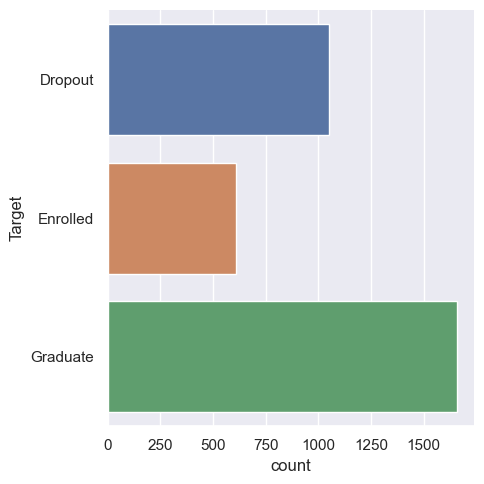

In [287]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Target", data = y_train, kind = "count")

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.8% of the points

KeyboardInterrupt: 

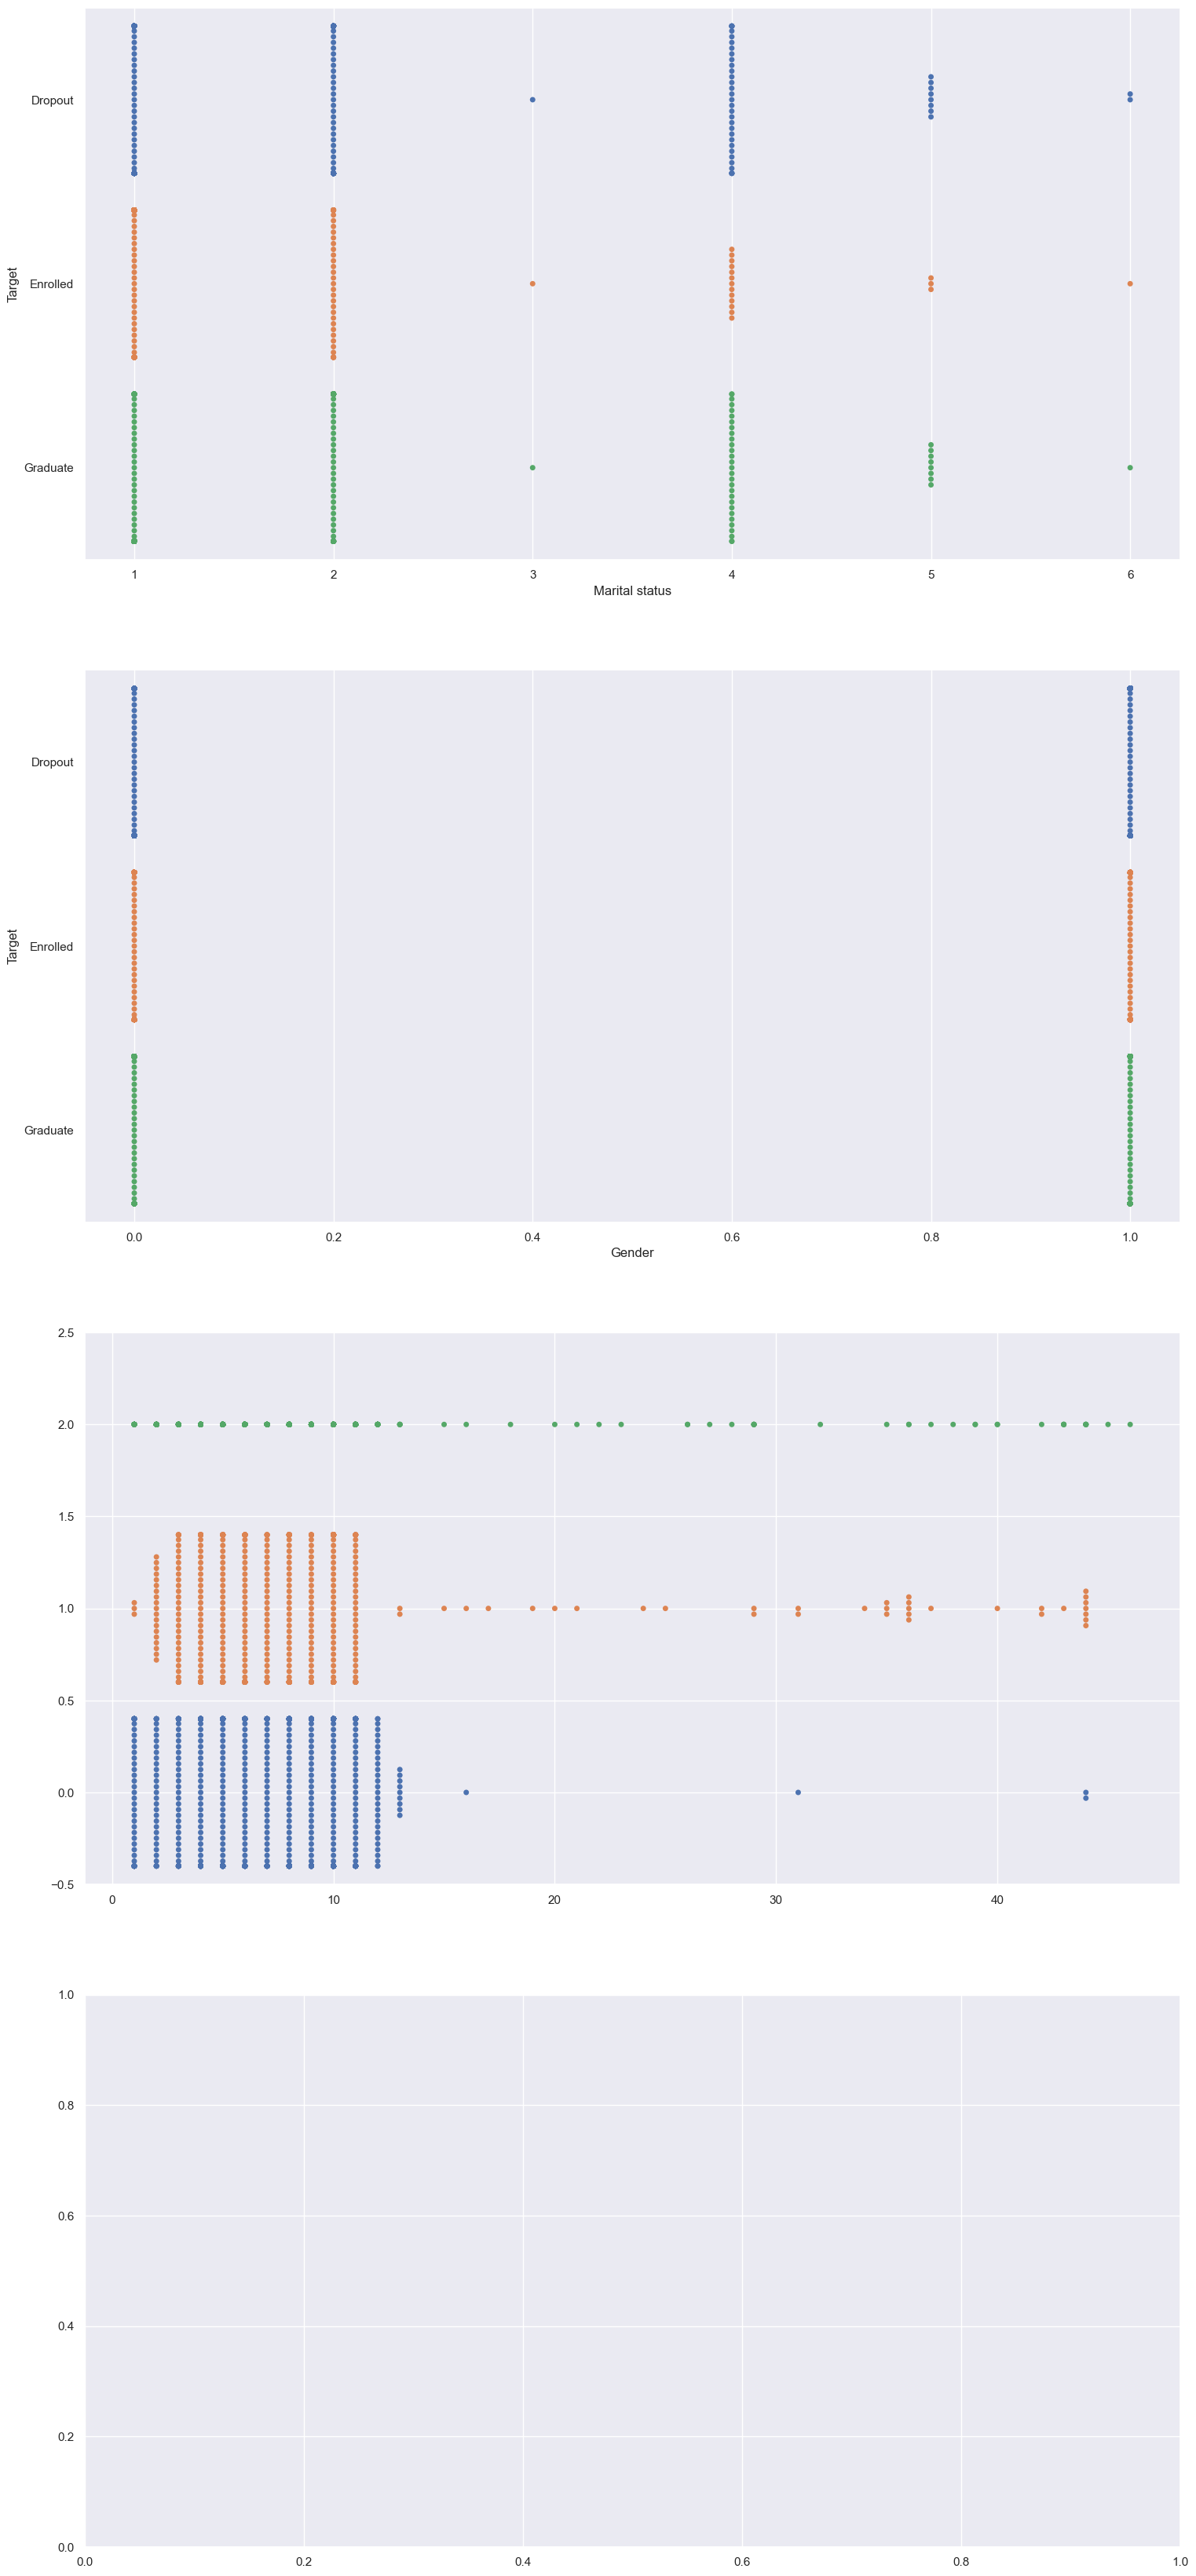

In [290]:
# Relationship between Response and the Predictors
df = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "Target", data = df, orient = "h", ax = axes[count])
    count += 1

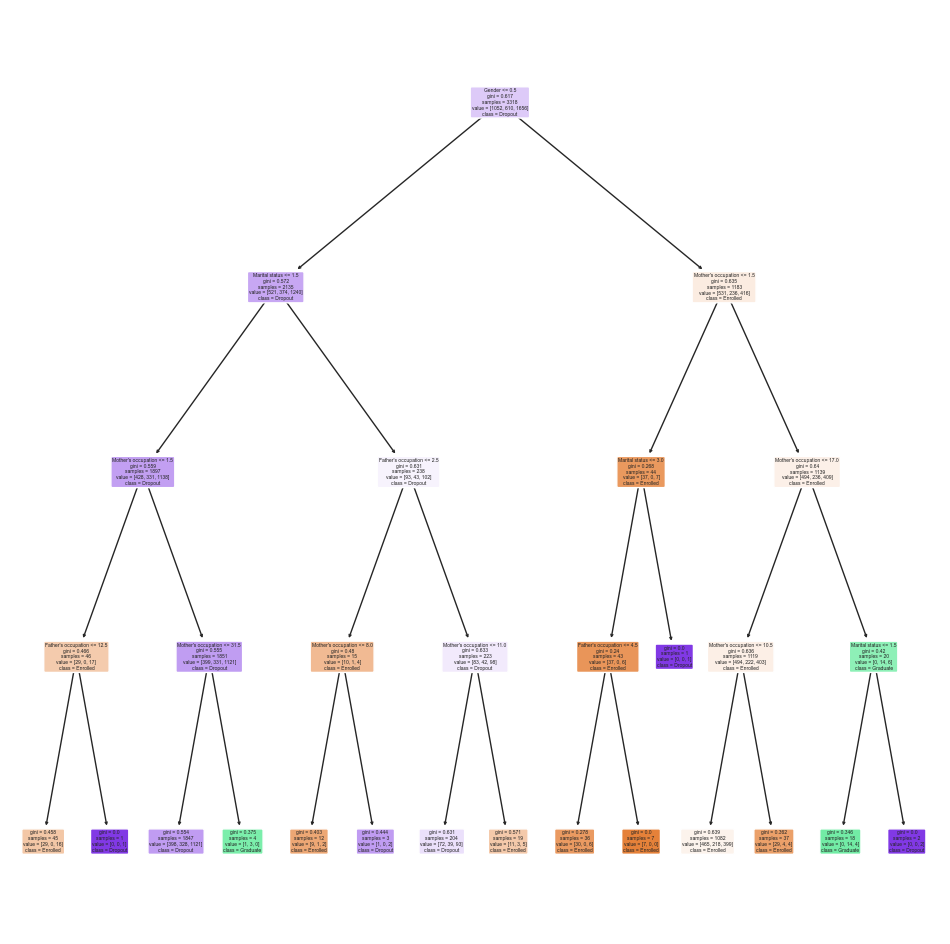

In [291]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Enrolled", "Graduate","Dropout"])

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5476190476190477

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5452079566003617



<AxesSubplot:>

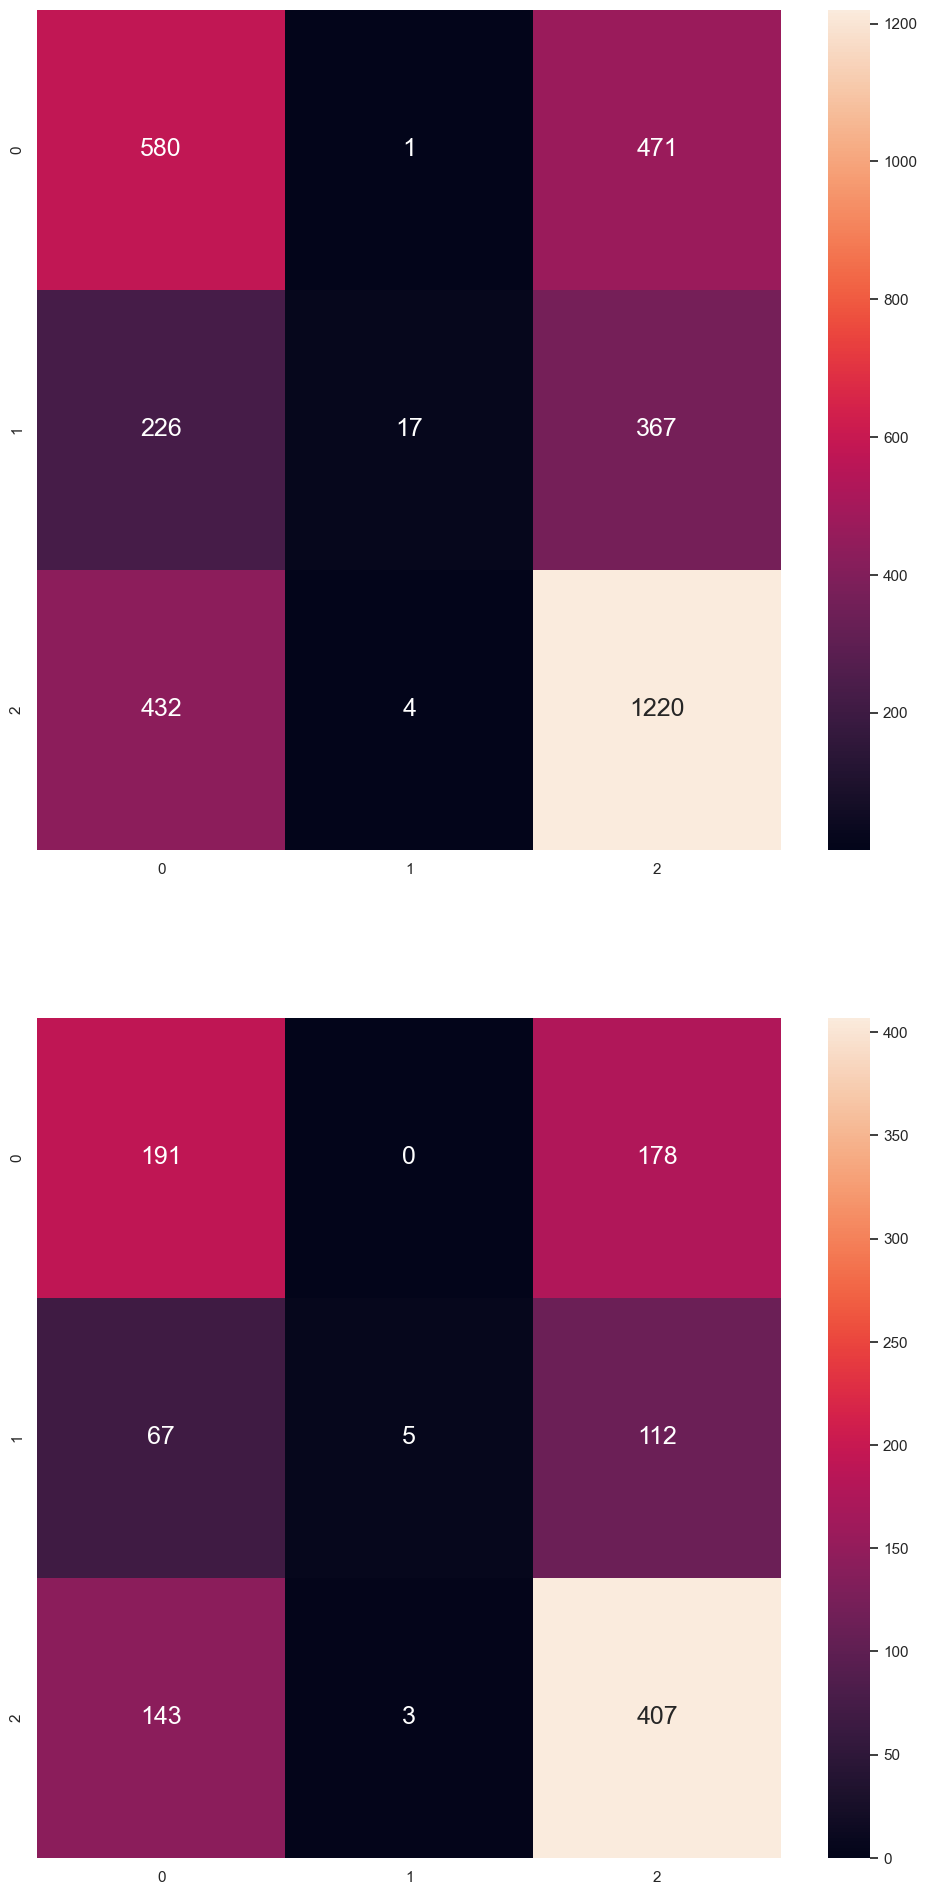

In [292]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As can be seen, the classification accuracy is very low when the model is created without removing anomalies. Now, we will remove anomalies using the 2 ways, Local Outlier Factor and Isolation Forest.

# Multi-Variate Classification Tree without anomalies

Anomaly count
Target                              653
Marital status                      653
Curricular units 1st sem (grade)    653
Mother's occupation                 653
Gender                              653
Father's occupation                 653
dtype: int64


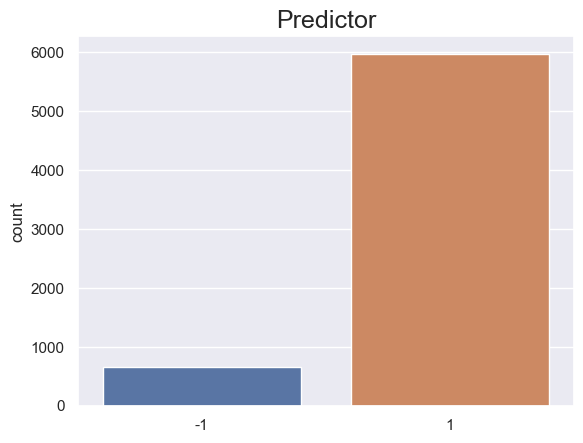

In [314]:
# Removing the anomalies using the Isolation Forest Model
df_tree_anomaly_removed, df_tree_removed_ohe, pred = remove_anomaly_iforest(df_knn, 100, True)

# Separating the y and x
y_anom_tree = df_tree_anomaly_removed['Target'].values
X_anom_tree = df_tree_removed_ohe

# Scaling of Curricular units 1st sem (grade)
scale = StandardScaler()
X_anom_tree[["Curricular units 1st sem (grade)"]] = scale.fit_transform(X_anom_tree[["Curricular units 1st sem (grade)"]])

In [367]:
# Split the Dataset into Train and Test
X_train_anom, X_test_anom, y_train_anom, y_test_anom = train_test_split(X_anom_tree, y_anom_tree, test_size = 0.25)

# Draw the distribution of Response
#sb.catplot(y_anom_tree = "Target", data = y_train_anom, kind = "count")

# Check the sample sizes
print("Train Set :", y_train_anom.shape, X_train_anom.shape)
print("Test Set  :", y_test_anom.shape, X_test_anom.shape)

Train Set : (4970,) (4970, 52)
Test Set  : (1657,) (1657, 52)


In [319]:
# Relationship between Response and the Predictors
y_anom_tree_df = pd.DataFrame(y_anom_tree)
X_anom_tree_df = pd.DataFrame(X_anom_tree)
noOutlierDf = pd.concat([y_anom_tree_df,X_anom_tree_df], axis = 1).reindex(y_train.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

### Hyperparameter tuning with Cross Validation and RandsomSearch

In [419]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object

# Define the hyperparameter search space
param_dist = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(dectree, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_anom, y_train_anom)

# Print the best hyperparameters and the corresponding performance metrics
print("Best hyperparameters: ", random_search.best_params_)
y_pred = random_search.predict(X_test_anom)
print("Accuracy: ", accuracy_score(y_test_anom, y_pred))
print("Precision: ", precision_score(y_test_anom, y_pred,average='weighted'))
print("Recall: ", recall_score(y_test_anom, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test_anom, y_pred, average='weighted'))

Best hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Accuracy:  0.5180995475113123
Precision:  0.5487155514032672
Recall:  0.5180995475113123
F1-score:  0.5036233604178623


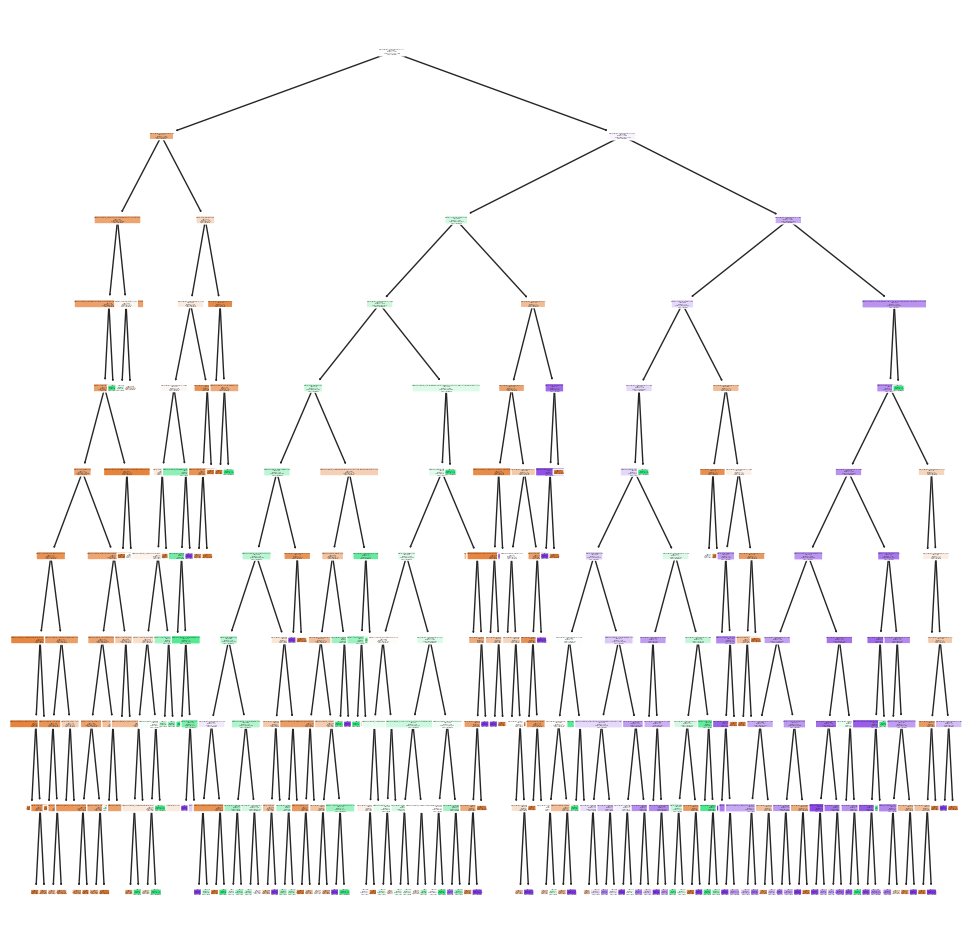

In [420]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train_anom, y_train_anom)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train_anom.columns, 
          class_names=["Enrolled", "Graduate","Dropout"])

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_anom)
y_test_pred = dectree.predict(X_test_anom)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6149783059800038

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5701357466063348



<AxesSubplot:>

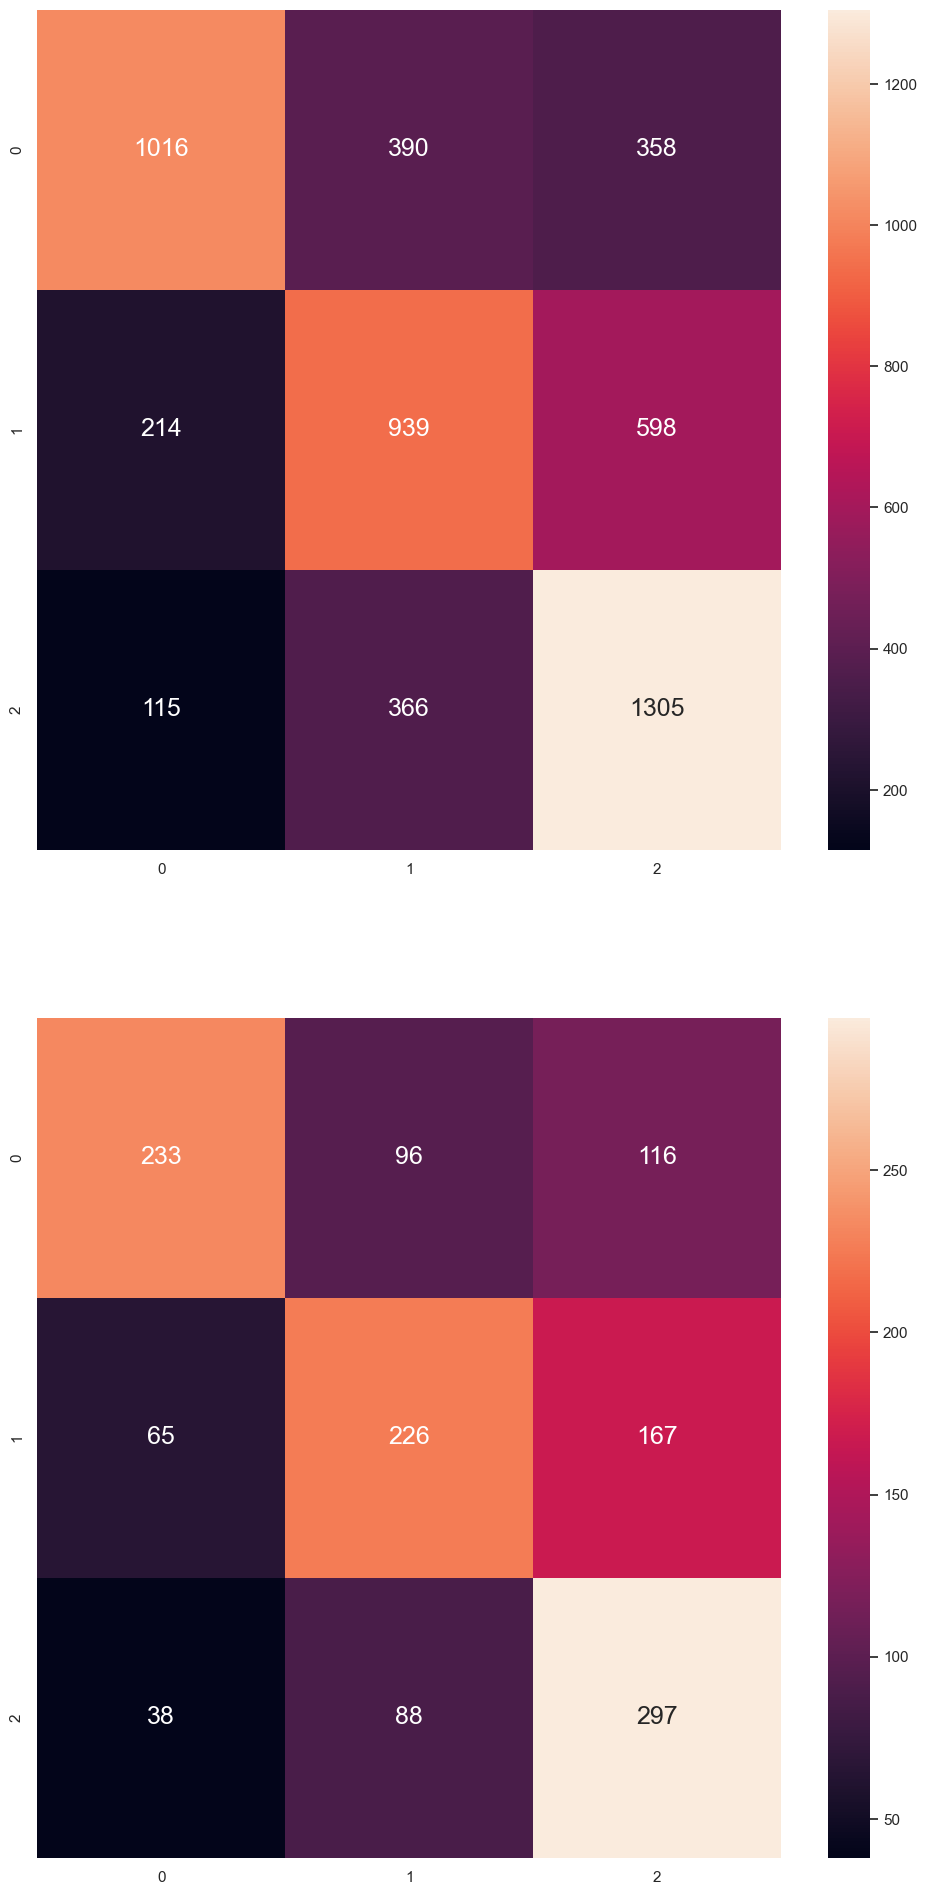

In [421]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train_anom, y_train_anom))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test_anom, y_test_anom))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train_anom, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_anom, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

With this model created without anomalies, it can be seen that 

---
# Conclusion